In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [308]:
lending_data = pd.read_csv("./loan.csv",low_memory=False)
lending_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
lending_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning 

Check for Null values in columns

In [310]:
((lending_data.isnull().sum()/len(lending_data.index)) * 100).sort_values(ascending=False)

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
                              ...  
pub_rec                         0.0
open_acc                        0.0
inq_last_6mths                  0.0
earliest_cr_line                0.0
id                              0.0
Length: 111, dtype: float64

Drop columns that contains more than 10% of null values

In [311]:
null_columns = lending_data.loc[:,((lending_data.isnull().sum()/len(lending_data.index)) * 100) > 10]
lending_data.drop(columns=null_columns.columns, inplace=True)
lending_data.shape

(39717, 53)

In [312]:
lending_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Check for percentage of 0 values in columns

In [313]:
(((lending_data==0).sum(axis=0)/len(lending_data.index)) * 100).sort_values(ascending=False)

delinq_amnt                   100.000000
acc_now_delinq                100.000000
tax_liens                      99.901805
chargeoff_within_12_mths       99.859002
collections_12_mths_ex_med     99.859002
out_prncp                      97.129693
out_prncp_inv                  97.129693
total_rec_late_fee             94.848554
pub_rec                        94.672307
pub_rec_bankruptcies           94.012639
collection_recovery_fee        90.477629
recoveries                     89.379863
delinq_2yrs                    89.143188
inq_last_6mths                 48.593801
revol_bal                       2.502707
dti                             0.460760
total_pymnt_inv                 0.415439
funded_amnt_inv                 0.324798
last_pymnt_amnt                 0.186318
total_rec_prncp                 0.186318
total_rec_int                   0.178765
total_pymnt                     0.040285
sub_grade                       0.000000
annual_inc                      0.000000
home_ownership  

Drop columns that contain more than 95% of 0 values

In [314]:
columns = lending_data.loc[:,(((lending_data==0).sum(axis=0)/len(lending_data.index)) * 100) > 95]
lending_data.drop(columns=columns.columns,inplace=True)
lending_data.shape

(39717, 46)

# Univariate Analysis

Analysis of each column separately and decisioning to drop or keep them for further process

In [315]:
#Total columns after data cleaning = 46
lending_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

In [316]:
#creating empty list and will add columns in it that needs to be dropped
columns_to_drop = []

Loan_amnt Analysis

In [317]:
lending_data['loan_amnt'].value_counts()

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
12525       1
16675       1
6175        1
22300       1
28750       1
Name: loan_amnt, Length: 885, dtype: int64

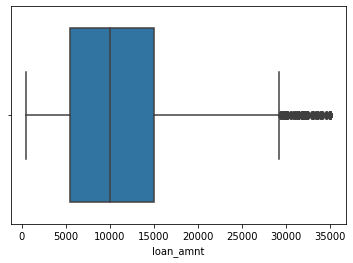

In [318]:
sns.boxplot(lending_data['loan_amnt'])

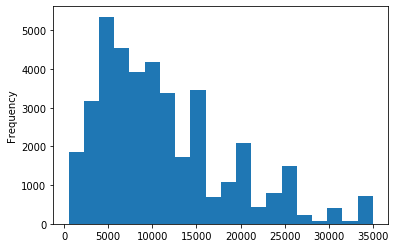

In [319]:
lending_data['loan_amnt'].plot.hist(bins = 20) #graph is right skewed

funded_amnt Analysis

In [320]:
lending_data['funded_amnt'].value_counts()

10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
25675       1
1475        1
30400       1
24275       1
28750       1
Name: funded_amnt, Length: 1041, dtype: int64

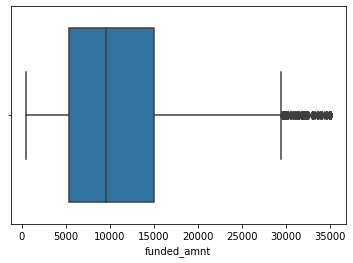

In [321]:
sns.boxplot(lending_data['funded_amnt'])

In [322]:
#seems like this column is similar to loan_amnt, check for this
lending_data[lending_data['loan_amnt'] != lending_data['funded_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
61,1068934,1277395,17500,8950,8925.000000,60 months,17.27%,223.74,D,D3,...,4277.10,0.000000,0.00,0.0000,Feb-16,2487.58,Jan-16,1,INDIVIDUAL,0.0
66,1069093,1303740,12500,8925,8925.000000,60 months,17.27%,223.11,D,D3,...,2742.43,0.000000,22.50,0.0000,Feb-14,223.11,May-16,1,INDIVIDUAL,1.0
70,1069043,1303486,20975,13575,13550.000000,60 months,17.58%,341.63,D,D4,...,4537.46,0.000000,0.00,0.0000,Apr-14,9245.21,Apr-14,1,INDIVIDUAL,1.0
77,1068416,1302799,7250,7200,7175.000000,60 months,21.67%,197.51,F,F3,...,1004.77,0.000000,0.00,0.0000,Sep-12,6824.70,Apr-16,1,INDIVIDUAL,1.0
80,1068994,1303432,35000,22075,22050.000000,60 months,17.27%,551.84,D,D3,...,6812.10,0.000000,0.00,0.0000,Feb-14,15660.22,Feb-14,1,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39533,167645,163382,10000,6000,700.000000,36 months,8.70%,189.97,B,B1,...,778.26,0.000000,0.00,0.0000,Apr-10,3.94,Jul-15,1,INDIVIDUAL,NaN
39593,141774,141767,20000,4800,1949.999594,36 months,13.12%,162.01,D,D5,...,427.59,0.000000,148.92,5.7222,Aug-08,162.01,May-16,1,INDIVIDUAL,NaN
39600,140036,140027,4000,1000,550.000000,36 months,9.96%,32.25,B,B5,...,148.91,0.000000,0.00,0.0000,Jan-10,32.25,May-16,1,INDIVIDUAL,NaN
39601,139980,139977,12000,5000,1399.996684,36 months,10.91%,163.49,C,C3,...,844.02,29.970725,55.16,0.7000,Mar-10,163.49,Aug-10,1,INDIVIDUAL,NaN


funded_amnt_inv Analysis

In [323]:
lending_data['funded_amnt_inv'].value_counts()

5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
13994.969990       1
21567.647640       1
18827.228540       1
1349.117393        1
7423.355587        1
Name: funded_amnt_inv, Length: 8205, dtype: int64

In [324]:
#rounding the funded_amnt_inv
lending_data['funded_amnt_inv'] = lending_data['funded_amnt_inv'].round(0)

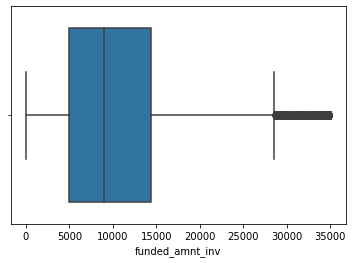

In [325]:
sns.boxplot(lending_data['funded_amnt_inv'])

In [326]:
#check if loan amount is less than funded_amnt_inv, if yes then need to remove that data
lending_data[lending_data['loan_amnt'] < lending_data['funded_amnt_inv']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies


<Figure size 1440x720 with 0 Axes>

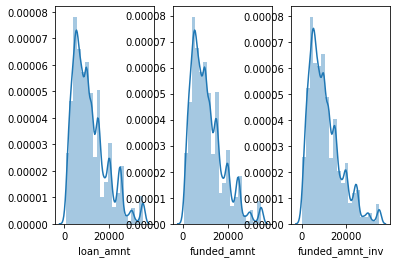

In [327]:
# Distribution plots loan amount , funded amount , funded_amnt_inv
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(ncols=3)
sns.distplot(a= lending_data.loan_amnt,ax=axs[0],bins=20,norm_hist=True)
sns.distplot(a= lending_data.funded_amnt,ax=axs[1],bins=20,norm_hist=True)
sns.distplot(a= lending_data.funded_amnt_inv,ax=axs[2],bins=20,norm_hist=True)
plt.show()
#Distributions are right skewed

term Analysis

In [328]:
lending_data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [329]:
#change to int for further analysis
lending_data['term'] = lending_data['term'].apply(lambda x : int(x.split()[0]))

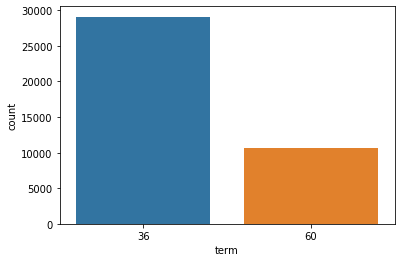

In [330]:
sns.countplot(lending_data['term'])

int_rate Analysis

In [331]:
lending_data['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.96%      1
24.40%      1
17.54%      1
17.34%      1
21.48%      1
Name: int_rate, Length: 371, dtype: int64

In [332]:
#change to float for further anlaysis
lending_data['int_rate'] = lending_data['int_rate'].apply(lambda x : float(x.rstrip('%')))

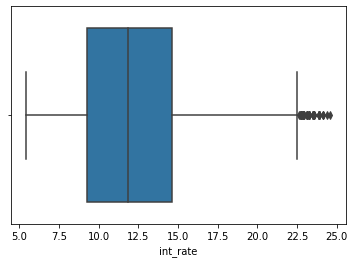

In [333]:
sns.boxplot(lending_data['int_rate'])

installment Analysis

In [334]:
lending_data['installment'].value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
883.88     1
726.19     1
279.19     1
632.84     1
759.63     1
Name: installment, Length: 15383, dtype: int64

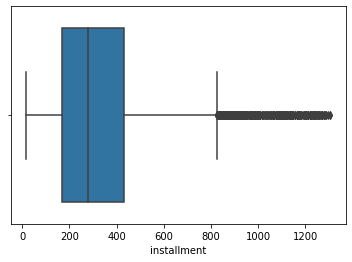

In [335]:
sns.boxplot(lending_data['installment']) #majority of the data is outlier

grade Analysis

In [336]:
lending_data['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

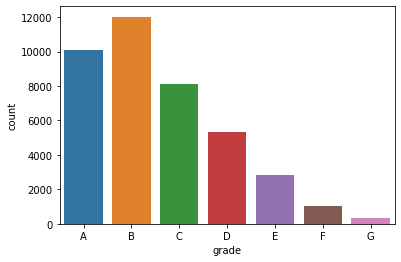

In [337]:
sns.countplot(lending_data['grade'].sort_values())

sub_grade Analysis

In [338]:
lending_data['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

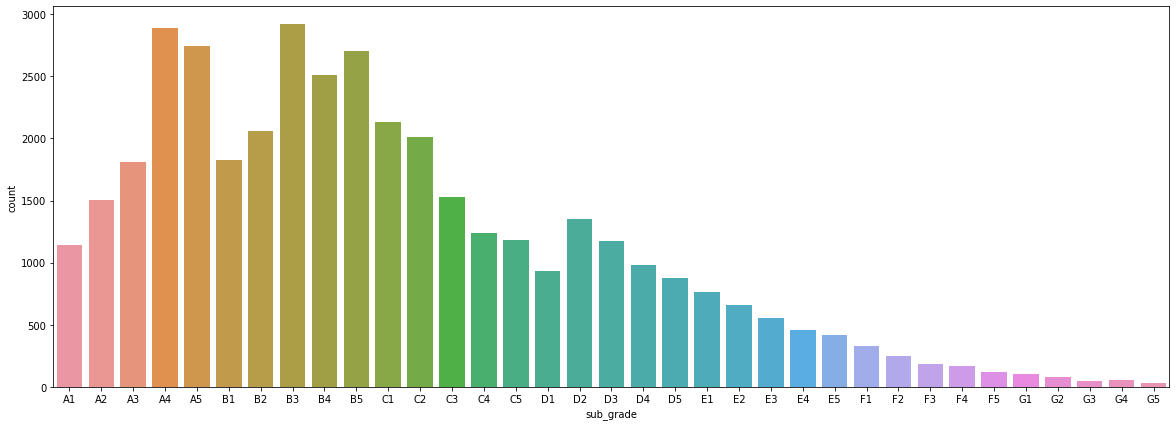

In [339]:
plt.figure(figsize=[20,7])
sns.countplot(lending_data['sub_grade'].sort_values())
plt.show()

emp_title Analysis

In [340]:
lending_data['emp_title'].value_counts()

US Army                        134
Bank of America                109
IBM                             66
AT&T                            59
Kaiser Permanente               56
                              ... 
MDF Systems Inc.                 1
Quill                            1
Louis T. Roth  and  Company      1
ACE Group                        1
s rothschild                     1
Name: emp_title, Length: 28820, dtype: int64

In [341]:
#does not have any relevance with loan default status, thus marking to drop the column
columns_to_drop.append('emp_title')

emp_length Analysis

In [342]:
lending_data['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [343]:
lending_data['emp_length'].isnull().sum()

1075

In [344]:
#cleaning the column to make it categorize under 0 - 10 years
lending_data = lending_data[~lending_data['emp_length'].isnull()]
lending_data.loc[lending_data['emp_length'] == '< 1 year', 'emp_length'] = '0 years'

import re
lending_data['emp_length'] = lending_data['emp_length'].apply(lambda x : int(re.findall('\d+',str(x))[0]))
lending_data['emp_length'].value_counts()

10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

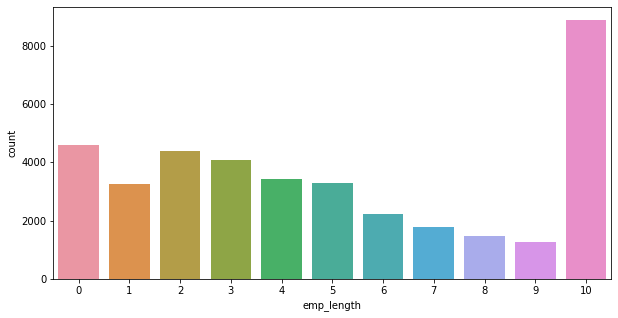

In [345]:
plt.figure(figsize=[10,5])
sns.countplot(lending_data['emp_length'])
plt.show()

home_ownership Analysis

In [346]:
lending_data['home_ownership'].value_counts()

RENT        18488
MORTGAGE    17212
OWN          2841
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

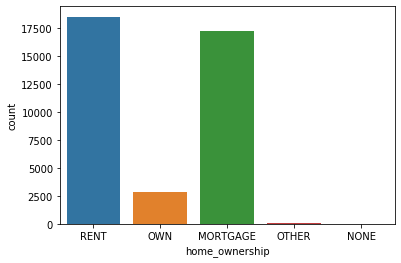

In [347]:
sns.countplot(lending_data['home_ownership'])

annual_inc Analysis

In [348]:
lending_data['annual_inc'].value_counts()

60000.0    1472
50000.0    1036
40000.0     859
45000.0     813
75000.0     803
           ... 
36276.0       1
59850.0       1
86923.0       1
31970.0       1
8472.0        1
Name: annual_inc, Length: 5100, dtype: int64

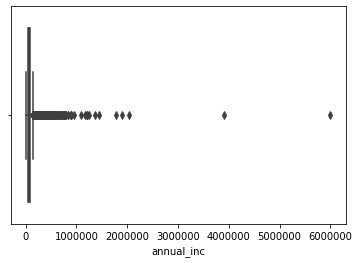

In [349]:
sns.boxplot(lending_data['annual_inc'])

In [350]:
#Removing outliers and storing data in separate dataframe
Q1 = lending_data['annual_inc'].quantile(0.25)
Q3 = lending_data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

LT = Q1 - 1.5*IQR
print(LT)
UT = Q3 + 1.5*IQR
print(UT)

-21299.985000000008
145899.975


In [351]:
lending_data = lending_data[lending_data['annual_inc'] <= UT]

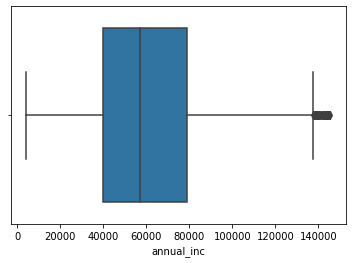

In [352]:
sns.boxplot(lending_data['annual_inc'])

verification_status Analysis

In [353]:
lending_data['verification_status'].value_counts()

Not Verified       16126
Verified           11404
Source Verified     9288
Name: verification_status, dtype: int64

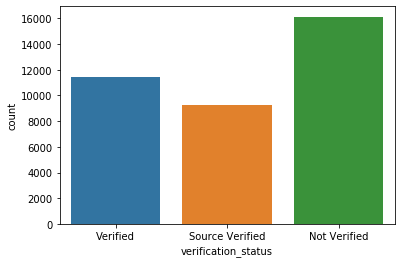

In [354]:
sns.countplot(lending_data['verification_status'])

issue_d Analysis

In [355]:
lending_data['issue_d'].value_counts() #month and year in which loan is issued

Dec-11    2126
Nov-11    2016
Oct-11    1897
Sep-11    1859
Aug-11    1771
Jul-11    1707
Jun-11    1667
May-11    1551
Apr-11    1448
Mar-11    1334
Jan-11    1283
Feb-11    1190
Dec-10    1174
Jul-10    1058
Nov-10    1057
Oct-10    1033
Aug-10    1014
Sep-10    1007
Jun-10     960
May-10     865
Apr-10     774
Mar-10     681
Feb-10     572
Nov-09     571
Dec-09     557
Jan-10     551
Oct-09     517
Sep-09     428
Aug-09     392
Jul-09     357
Jun-09     340
May-09     305
Apr-09     280
Mar-09     269
Feb-09     253
Jan-09     229
Mar-08     225
Dec-08     207
Nov-08     180
Feb-08     169
Jan-08     164
Apr-08     148
Oct-08      89
Dec-07      82
Jul-08      82
May-08      69
Aug-08      67
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      29
Jul-07      24
Sep-07      15
Jun-07       1
Name: issue_d, dtype: int64

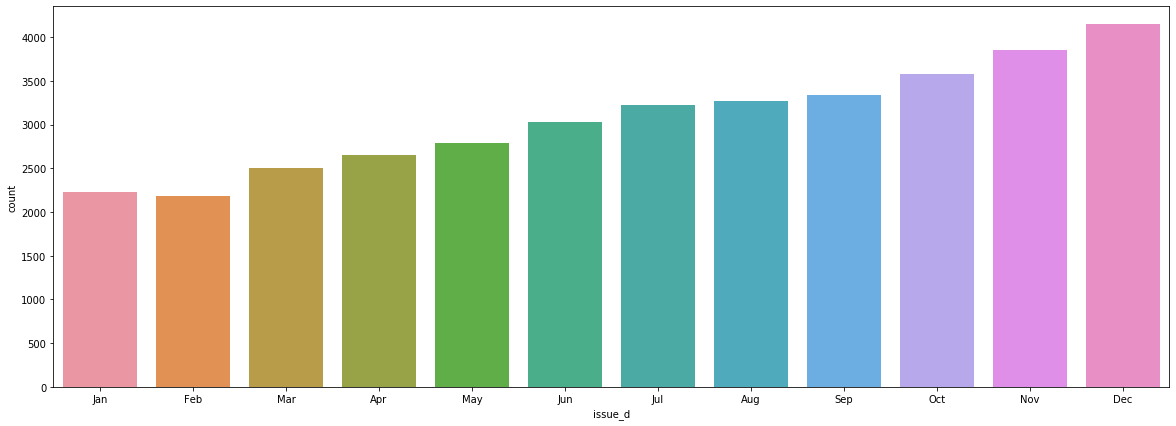

In [356]:
#plot to analyse month of issuing the loan
plt.figure(figsize=[20,7])
sns.countplot(lending_data['issue_d'].apply(lambda x: x.split("-")[0]),
             order=['Jan','Feb','Mar','Apr','May','Jun',
                   'Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

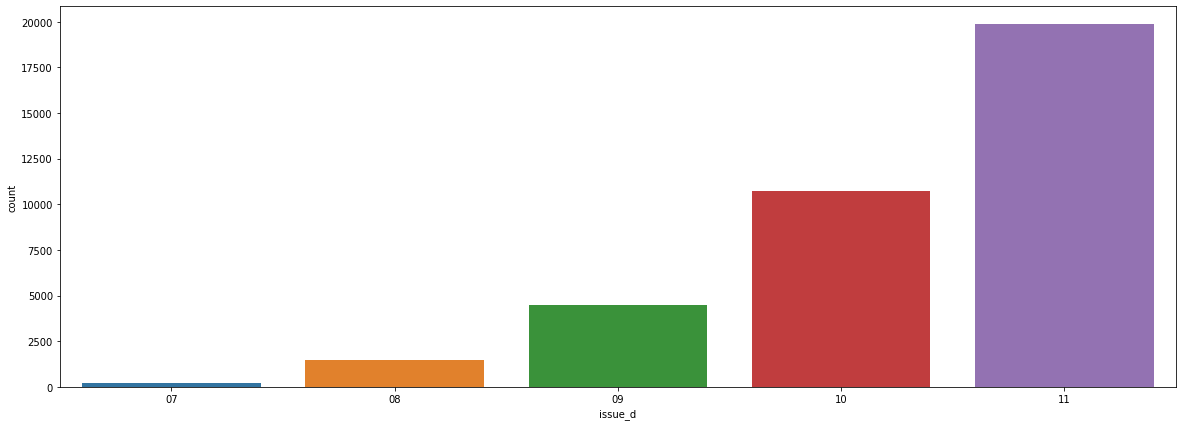

In [357]:
#plot to analyse year of issuing the loan
plt.figure(figsize=[20,7])
sns.countplot(lending_data['issue_d'].apply(lambda x: x.split("-")[1]))
plt.show()

loan_status Analysis

In [358]:
lending_data['loan_status'].value_counts()

Fully Paid     30596
Charged Off     5206
Current         1016
Name: loan_status, dtype: int64

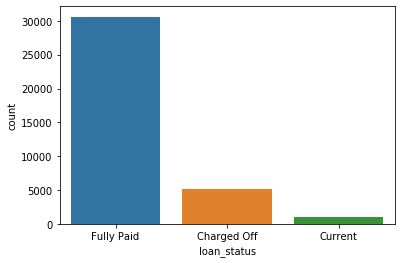

In [359]:
sns.countplot(lending_data['loan_status']) #target column

pymnt_plan Analysis

In [360]:
lending_data['pymnt_plan'].value_counts()

n    36818
Name: pymnt_plan, dtype: int64

In [361]:
#marking to drop the column as it contains only single value
columns_to_drop.append('pymnt_plan')

url Analysis

In [362]:
lending_data['url'].value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=851074     1
https://lendingclub.com/browse/loanDetail.action?loan_id=679572     1
https://lendingclub.com/browse/loanDetail.action?loan_id=715147     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1001920    1
https://lendingclub.com/browse/loanDetail.action?loan_id=374129     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=752067     1
https://lendingclub.com/browse/loanDetail.action?loan_id=679103     1
https://lendingclub.com/browse/loanDetail.action?loan_id=502405     1
https://lendingclub.com/browse/loanDetail.action?loan_id=1053617    1
https://lendingclub.com/browse/loanDetail.action?loan_id=651918     1
Name: url, Length: 36818, dtype: int64

In [363]:
#contains the url of application , marking to drop 
columns_to_drop.append('url')

purpose Analysis

In [364]:
lending_data['purpose'].value_counts()

debt_consolidation    17534
credit_card            4773
other                  3670
home_improvement       2570
major_purchase         2018
small_business         1659
car                    1455
wedding                 903
medical                 628
moving                  534
vacation                343
house                   337
educational             306
renewable_energy         88
Name: purpose, dtype: int64

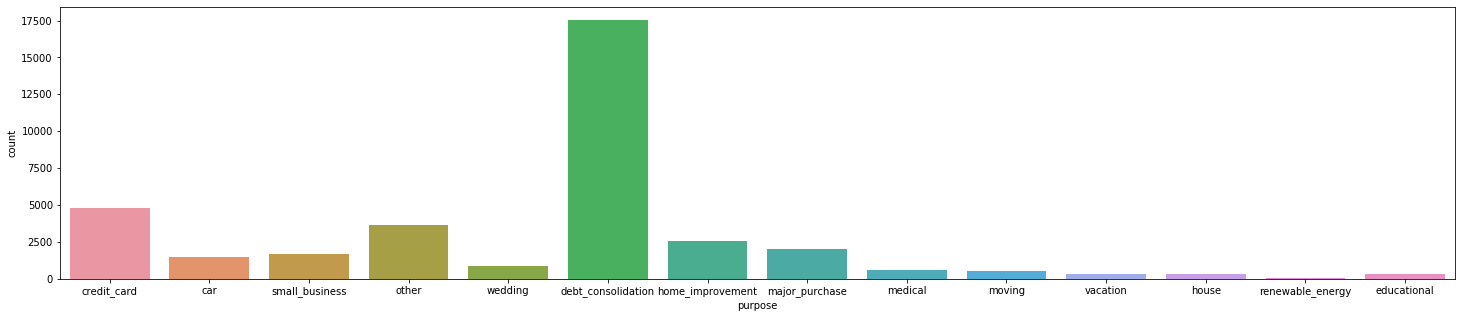

In [365]:
plt.figure(figsize=[25,5])
sns.countplot(lending_data['purpose'])
plt.show()

title Analysis

In [366]:
lending_data['title'].value_counts()

Debt Consolidation                         2039
Debt Consolidation Loan                    1602
Personal Loan                               613
Consolidation                               475
debt consolidation                          464
                                           ... 
Multi-purpose loan                            1
Make home improvments before selling          1
citifinancial                                 1
Consolidating debt incurred from moving       1
Car Deal                                      1
Name: title, Length: 18383, dtype: int64

In [367]:
#contains the loan purpose which is already given in 'purpose' column, thus marking to drop
columns_to_drop.append('title')

zip_code Analysis

In [368]:
lending_data['zip_code'].value_counts()

100xx    498
945xx    498
112xx    494
606xx    476
070xx    438
        ... 
396xx      1
388xx      1
353xx      1
479xx      1
677xx      1
Name: zip_code, Length: 819, dtype: int64

In [369]:
#does not have any relevance with loan getting defaulted, thus marking to drop
columns_to_drop.append('zip_code')

addr_state Analysis

In [370]:
lending_data['addr_state'].value_counts()

CA    6540
NY    3480
FL    2657
TX    2495
NJ    1707
PA    1439
IL    1420
VA    1318
GA    1294
MA    1225
OH    1161
MD     981
AZ     799
WA     772
CO     748
NC     730
CT     682
MI     667
MO     644
MN     578
NV     461
SC     446
WI     432
OR     429
AL     421
LA     402
KY     312
OK     288
KS     250
UT     242
AR     230
DC     200
RI     189
NM     177
WV     166
HI     164
NH     155
DE     107
WY      79
MT      79
AK      71
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

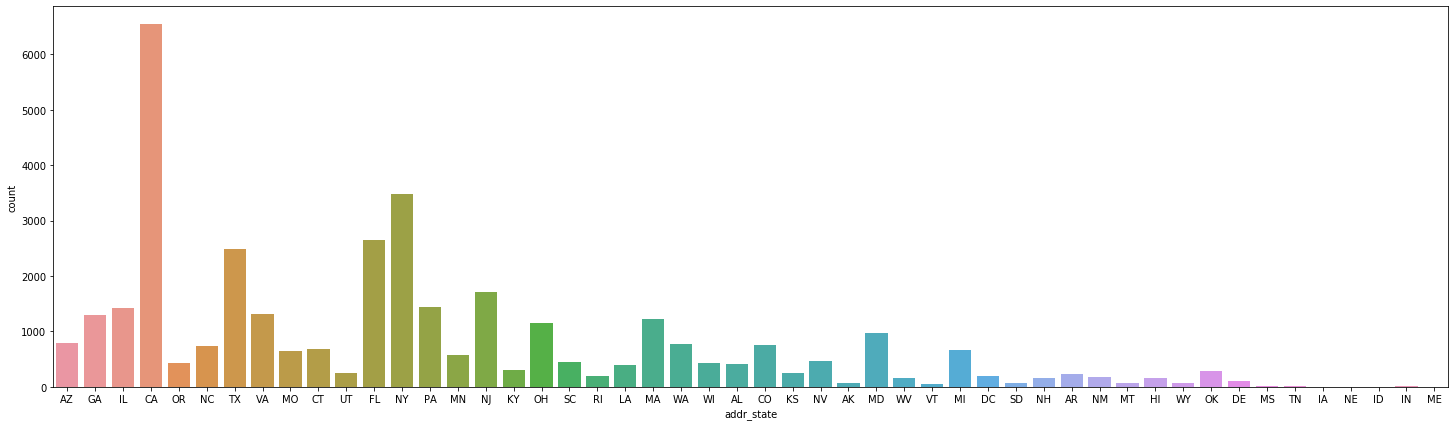

In [371]:
plt.figure(figsize=[25,7])
sns.countplot(lending_data['addr_state'])
plt.show() #CA has highest percentage of loans, will check in further analysis

dti Analysis

In [372]:
lending_data['dti'].value_counts()

0.00     165
12.00     44
18.00     43
19.20     40
16.80     38
        ... 
27.37      1
0.19       1
28.74      1
27.39      1
28.71      1
Name: dti, Length: 2859, dtype: int64

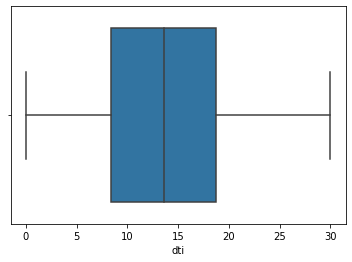

In [373]:
sns.boxplot(lending_data['dti'])

In [374]:
lending_data[lending_data['dti'] > 45]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies


delinq_2yrs Analysis

In [375]:
lending_data['delinq_2yrs'].value_counts()

0     32843
1      3062
2       613
3       204
4        59
5        19
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

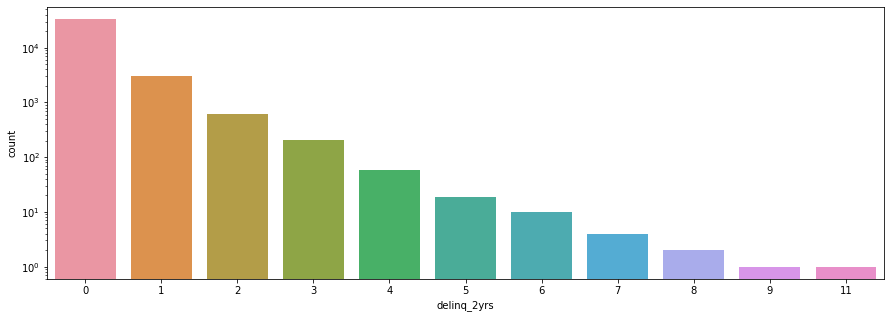

In [376]:
plt.figure(figsize=[15,5])
g = sns.countplot(lending_data['delinq_2yrs'])
g.set_yscale("log")
plt.show()

earliest_cr_line Analysis

In [377]:
lending_data['earliest_cr_line'].value_counts() 

Oct-99    353
Nov-98    347
Dec-98    330
Oct-00    324
Nov-00    309
         ... 
Apr-72      1
Jun-72      1
Nov-72      1
Oct-70      1
Sep-56      1
Name: earliest_cr_line, Length: 511, dtype: int64

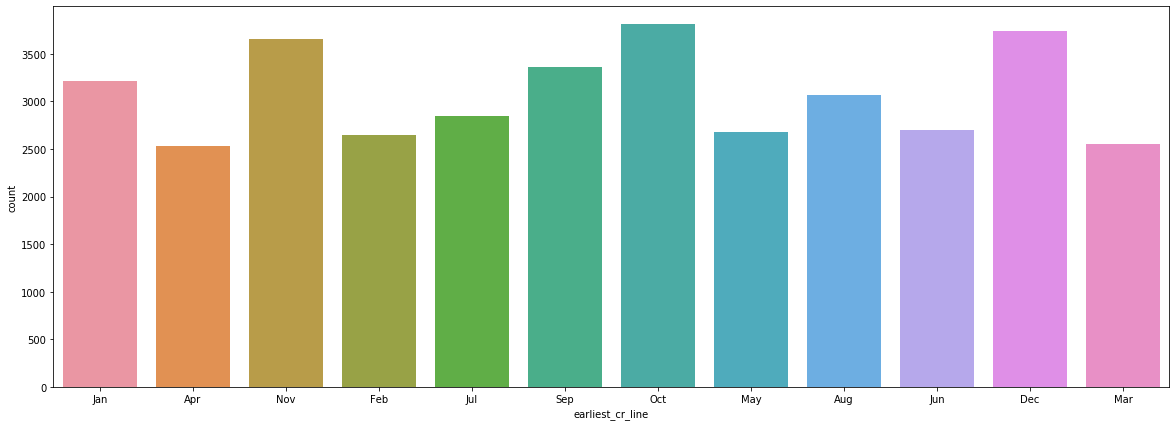

In [378]:
#plot to analyse month of credit line
plt.figure(figsize=[20,7])
sns.countplot(lending_data['earliest_cr_line'].apply(lambda x: x.split("-")[0]))
plt.show()

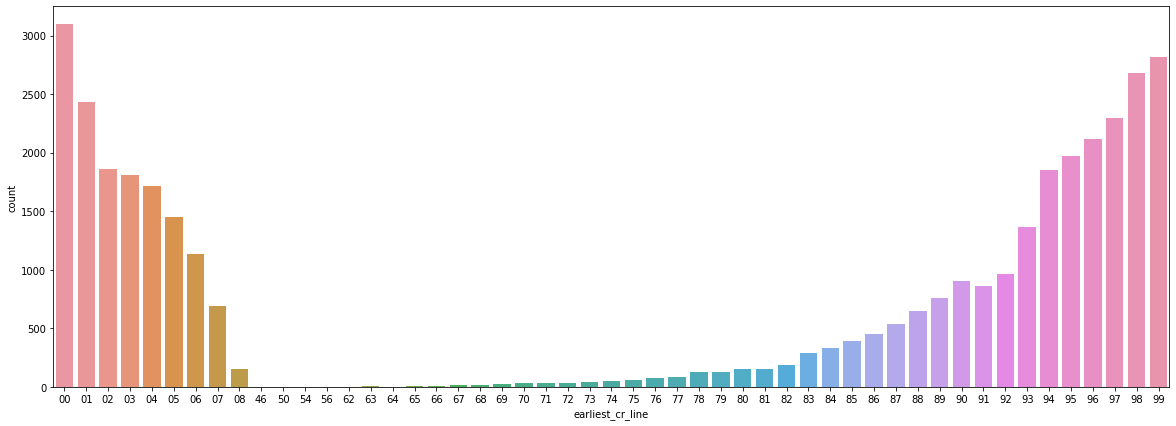

In [379]:
#plot to analyse year of credit line
plt.figure(figsize=[20,7])
sns.countplot(lending_data['earliest_cr_line'].apply(lambda x: x.split("-")[1]))
plt.show()

In [380]:
#Not able to see any relevant pattern that shows the impact on loan, thus marking to drop
columns_to_drop.append('earliest_cr_line')

inq_last_6mths Analysis

In [381]:
lending_data['inq_last_6mths'].value_counts()

0    17946
1    10192
2     5368
3     2791
4      288
5      134
6       56
7       31
8       12
Name: inq_last_6mths, dtype: int64

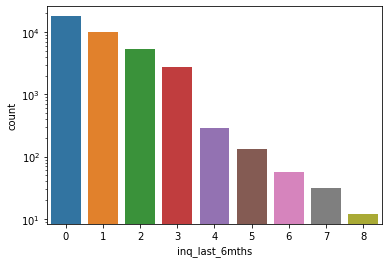

In [382]:
g = sns.countplot(lending_data['inq_last_6mths'])
g.set_yscale("log")

open_acc Analysis

In [383]:
lending_data['open_acc'].value_counts()

7     3796
8     3701
6     3700
9     3477
10    2989
5     2988
11    2536
4     2210
12    2082
13    1734
3     1404
14    1348
15    1063
16     843
17     647
2      558
18     473
19     351
20     257
21     221
22     127
23      83
24      65
25      53
26      22
27      21
28      21
30      12
29       8
31       6
34       5
32       4
35       3
33       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

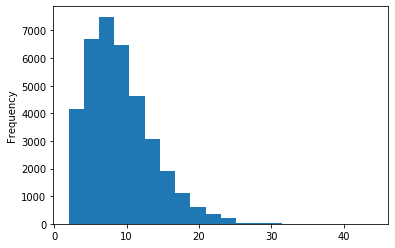

In [384]:
lending_data['open_acc'].plot.hist(bins=20)

revol_bal Analysis

In [385]:
lending_data['revol_bal'].value_counts()

0        912
1         11
255       10
1159       9
39         9
        ... 
28565      1
6042       1
10140      1
14238      1
4242       1
Name: revol_bal, Length: 20425, dtype: int64

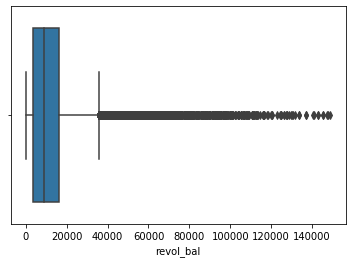

In [386]:
sns.boxplot(lending_data['revol_bal']) #most of the values are outlier

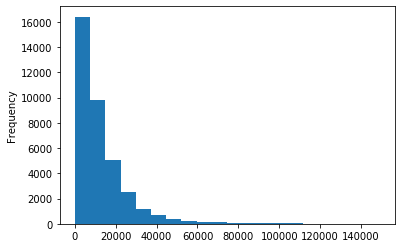

In [387]:
lending_data['revol_bal'].plot.hist(bins=20)

revol_util Analysis

In [388]:
lending_data['revol_util'].value_counts()

0%        878
0.20%      60
63%        60
66.70%     57
46.40%     55
         ... 
10.17%      1
29.53%      1
1.88%       1
33.14%      1
58.19%      1
Name: revol_util, Length: 1082, dtype: int64

In [389]:
lending_data['revol_util'].isnull().sum()

46

In [390]:
#dropping these 50 null values to analyse the column 
lending_data = lending_data[~lending_data['revol_util'].isnull()]

In [391]:
lending_data['revol_util'] = lending_data['revol_util'].apply(lambda x : float(x.replace("%","")))

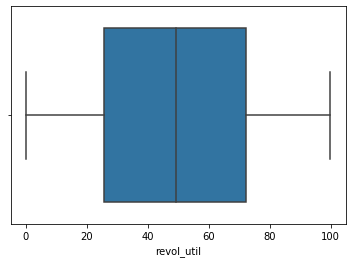

In [392]:
sns.boxplot(lending_data['revol_util'])

total_acc Analysis

In [393]:
lending_data['total_acc'].value_counts()

15    1393
16    1393
14    1376
17    1363
20    1357
      ... 
75       1
81       1
73       1
79       1
70       1
Name: total_acc, Length: 81, dtype: int64

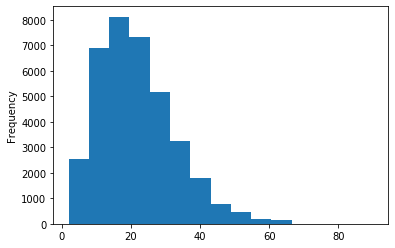

In [394]:
lending_data['total_acc'].plot.hist(bins=15)

initial_list_status Analysis

In [395]:
lending_data['initial_list_status'].value_counts()

f    36772
Name: initial_list_status, dtype: int64

In [396]:
#contains only single value, thus marking to drop the column
columns_to_drop.append('initial_list_status')

total_pymnt Analysis

In [397]:
lending_data['total_pymnt'].value_counts()

11196.569430    26
11784.232230    16
0.000000        15
13148.137860    13
10956.775960    13
                ..
12952.546900     1
14157.282020     1
556.140000       1
11113.766520     1
6441.546324      1
Name: total_pymnt, Length: 35126, dtype: int64

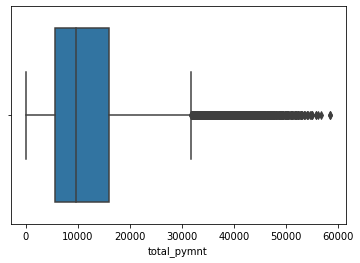

In [398]:
sns.boxplot(lending_data['total_pymnt'])

In [399]:
#This column comes into picture only after taking the loan. Not able to find any relevance to predict defaulter beforehand
#Marking to drop
columns_to_drop.append('total_pymnt')

total_pymnt_inv Analysis

In [400]:
lending_data['total_pymnt_inv'].value_counts()

0.00        157
6514.52      12
13148.14     12
11196.57     12
7328.92      11
           ... 
11021.76      1
24961.54      1
20717.81      1
15003.46      1
5193.80       1
Name: total_pymnt_inv, Length: 34816, dtype: int64

In [401]:
#same as above, marking to drop
columns_to_drop.append('total_pymnt_inv')

total_rec_prncp Analysis

In [402]:
lending_data['total_rec_prncp'].value_counts()

10000.00    2145
12000.00    1701
5000.00     1605
6000.00     1552
15000.00    1275
            ... 
12127.06       1
2957.46        1
313.26         1
11391.47       1
5086.41        1
Name: total_rec_prncp, Length: 7380, dtype: int64

In [403]:
#same as above, marking to drop
columns_to_drop.append('total_rec_prncp')

total_rec_int Analysis

In [404]:
lending_data['total_rec_int'].value_counts()

0.00       62
1196.57    26
1784.23    17
717.95     16
1148.14    15
           ..
1190.90     1
4029.27     1
1040.81     1
1586.14     1
128.47      1
Name: total_rec_int, Length: 32721, dtype: int64

In [405]:
#same as above, marking to drop
columns_to_drop.append('total_rec_int')

recoveries Analysis

In [406]:
lending_data['recoveries'].value_counts()

0.00       32871
16.27          3
12.09          3
13.59          3
10.13          3
           ...  
71.41          1
321.76         1
2563.40        1
1573.14        1
1842.51        1
Name: recoveries, Length: 3755, dtype: int64

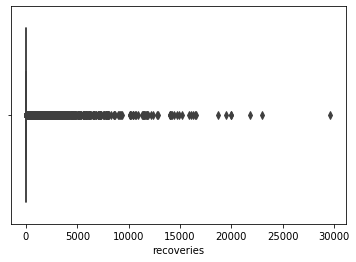

In [407]:
sns.boxplot(lending_data['recoveries'])

In [408]:
#Removing outliers and storing data in separate dataframe
Q1 = lending_data['recoveries'].quantile(0.25)
Q3 = lending_data['recoveries'].quantile(0.75)
IQR = Q3 - Q1

LT = Q1 - 1.5*IQR
print(LT)
UT = Q3 + 1.5*IQR
print(UT)

0.0
0.0


In [409]:
#reprents post charged off gross recoveries
#Will do bivariate Analysis and Segmented Univariate Analysis with other parameters

last_pymnt_d Analysis

In [410]:
lending_data['last_pymnt_d'].value_counts()

May-16    1120
Mar-13     953
Dec-14     877
May-13     840
Feb-13     813
          ... 
Nov-08      10
Jun-08       9
Mar-08       3
Jan-08       2
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [411]:
#represents last month payment received, thus marking to drop
columns_to_drop.append('last_pymnt_d')

last_pymnt_amnt Analysis

In [412]:
lending_data['last_pymnt_amnt'].value_counts()

0.00       63
276.06     21
200.00     17
100.00     13
50.00      13
           ..
1363.76     1
168.55      1
177.93      1
2287.05     1
6911.50     1
Name: last_pymnt_amnt, Length: 32596, dtype: int64

In [413]:
#represents last total payment amount received, thus marking to drop
columns_to_drop.append('last_pymnt_amnt')

last_credit_pull_d Analysis

In [414]:
lending_data['last_credit_pull_d'].value_counts()

May-16    9539
Apr-16    2350
Mar-16    1054
Feb-13     775
Feb-16     689
          ... 
Sep-07       2
May-08       1
Jul-07       1
Jul-08       1
Jun-08       1
Name: last_credit_pull_d, Length: 105, dtype: int64

In [415]:
lending_data['last_credit_pull_d'].isnull().sum()

2

In [416]:
#dropping null values to analysis further
lending_data = lending_data[~lending_data['last_credit_pull_d'].isnull()]

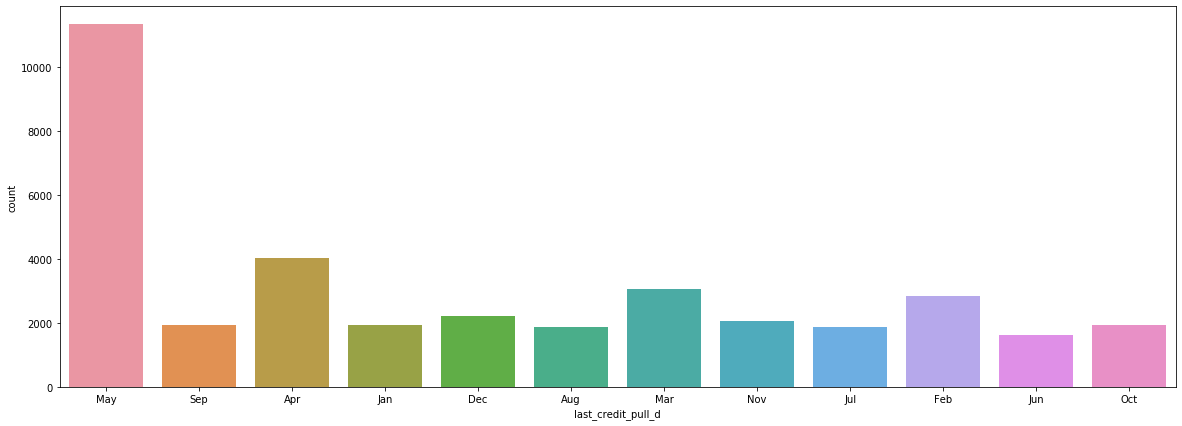

In [417]:
#plot to analyse month of last credit pulled by LC
plt.figure(figsize=[20,7])
sns.countplot(lending_data['last_credit_pull_d'].apply(lambda x: x.split("-")[0]))
plt.show()

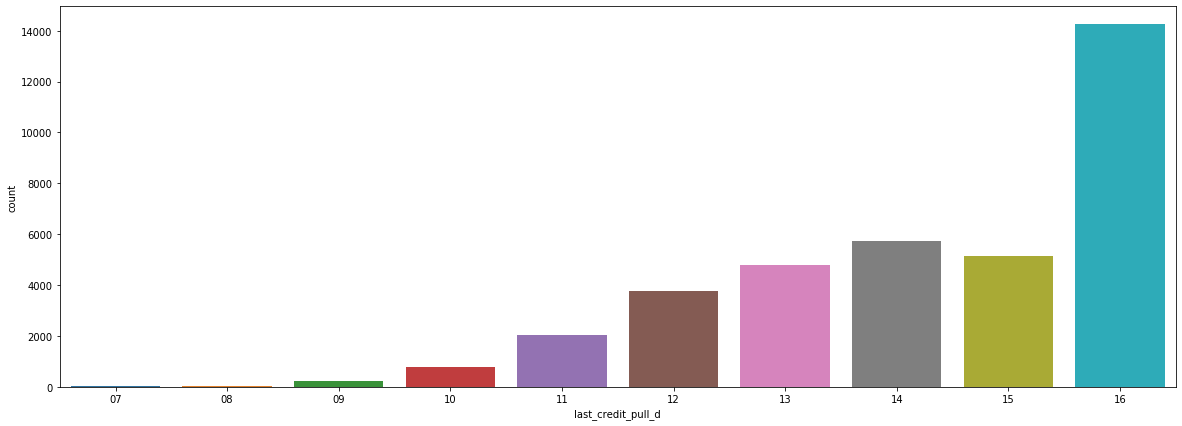

In [418]:
#plot to analyse year of last credit pulled by LC
plt.figure(figsize=[20,7])
sns.countplot(lending_data['last_credit_pull_d'].apply(lambda x: x.split("-")[1]))
plt.show() 

In [419]:
#Not able to find any relevant pattern, thus marking to drop
columns_to_drop.append('last_credit_pull_d')

policy_code Analysis

In [420]:
lending_data['policy_code'].value_counts()

1    36770
Name: policy_code, dtype: int64

In [421]:
#contains only single value, thus marking to drop
columns_to_drop.append('policy_code')

application_type Analysis

In [422]:
lending_data['application_type'].value_counts()

INDIVIDUAL    36770
Name: application_type, dtype: int64

In [423]:
#contains only single value, thus marking to drop
columns_to_drop.append('application_type')

total_rec_late_fee Analysis

In [424]:
lending_data['total_rec_late_fee'].value_counts()

0.000000     34879
15.000000      235
15.000000       54
30.000000       54
15.000000       41
             ...  
14.931369        1
36.246998        1
81.108708        1
14.957715        1
30.274425        1
Name: total_rec_late_fee, Length: 1249, dtype: int64

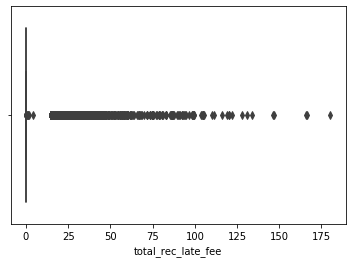

In [425]:
sns.boxplot(lending_data['total_rec_late_fee'])

In [426]:
#Represents Late fees received to date, which has no relation with charged Off so marking to drop
columns_to_drop.append('total_rec_late_fee')

collection_recovery_fee Analysis

In [427]:
lending_data['collection_recovery_fee'].value_counts()

0.0000      33273
2.0000         12
1.2000          9
3.7100          9
2.0200          8
            ...  
15.0026         1
7.9820          1
161.6306        1
20.7576         1
5.1665          1
Name: collection_recovery_fee, Length: 2437, dtype: int64

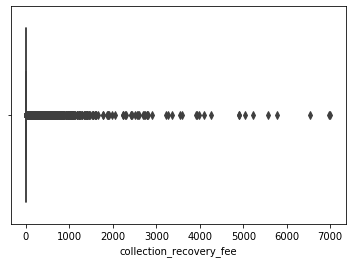

In [428]:
sns.boxplot(lending_data['collection_recovery_fee'])

In [429]:
#Represents post charge off collection fee, which comes into existence after loan is charged off so marking to drop
columns_to_drop.append('collection_recovery_fee')

pub_rec_bankruptcies Analysis

In [430]:
lending_data['pub_rec_bankruptcies'].value_counts()

0.0    34577
1.0     1527
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

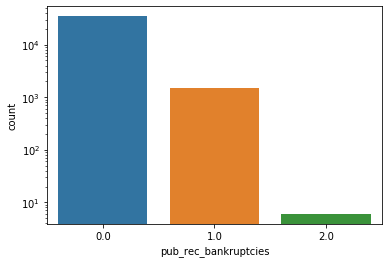

In [431]:
g = sns.countplot(lending_data['pub_rec_bankruptcies'])
g.set_yscale("log")
#may be has correlation with charged Off, will analyse with Loan Status

pub_rec Analysis

In [432]:
lending_data['pub_rec'].value_counts()

0    34827
1     1889
2       46
3        6
4        2
Name: pub_rec, dtype: int64

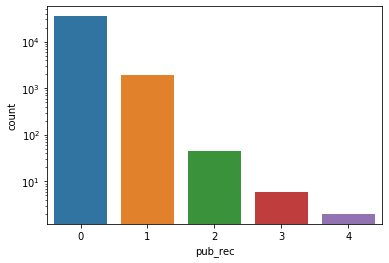

In [433]:
g = sns.countplot(lending_data['pub_rec'])
g.set_yscale("log")
#may be has correlation with charged Off, will analyse with Loan Status

Done with Univariate Analysis of 46 columns. Dropping columns that is present in columns_to_drop list

In [434]:
lending_data.drop(columns=columns_to_drop, inplace=True)
lending_data.shape

(36770, 28)

# Segmented Univariate Analysis

Analysis of all the columns with target variable 'loan_status'

Defining functions that will be needed to draw plots

In [435]:
#To plot countplot with hue as 'loan_status'
def countplot_with_hue(feature, figuresize=(6.4, 4.8)):
    plt.figure(figsize=figuresize)
    feature = lending_data[feature]
    feature_value_counts = feature.value_counts(sort=False)
    
    plot = sns.countplot(feature, hue=lending_data['loan_status'], 
                   order = feature_value_counts.index)
    
    Number_of_categories = len(feature_value_counts)
    hue_categories = len(lending_data['loan_status'].value_counts())
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    
    for i in range(Number_of_categories):
        total = feature_value_counts.values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
   
    plt.legend(title='loan_status', loc='upper right')
    plt.show()

In [436]:
#To bin the feature based on given step size
def bin_feature(feature, step):
    lower = feature.min()
    higher = feature.max()
    bins = np.arange(lower, higher, step)
    labels = ['-'.join(map(str,(x,y))) for x, y in zip(bins[:-1], bins[1:])]
    return pd.cut(feature, bins, labels=labels)

In [437]:
#To plot the stacked bar graph for given feature
def plot_stacked_bar(feature, figuresize=(6.4, 4.8),rotation=0):
    variable_plot=lending_data.groupby([feature, 'loan_status']).size().reset_index().pivot(columns='loan_status', index=feature,values=0)
    variable_plot=variable_plot[['Charged Off','Fully Paid']].apply(lambda x : (x/x.sum())*100,axis=1)
    variable_plot.plot(kind='bar', stacked=True,figsize=figuresize,rot=rotation)
    plt.ylabel("Percentage of Loan Status")

Selecting data of only loan_status = 'Fully Paid', 'Charged Off'

In [438]:
lending_data = lending_data[lending_data['loan_status'].isin(['Fully Paid','Charged Off'])]
lending_data.shape

(35754, 28)

In [439]:
lending_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'recoveries', 'pub_rec_bankruptcies'],
      dtype='object')

#### loan_amnt - loan_status Analysis

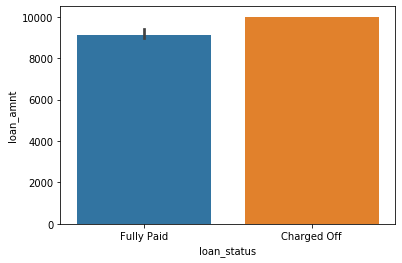

In [440]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['loan_amnt'], estimator=np.median) #chargedOff data is high

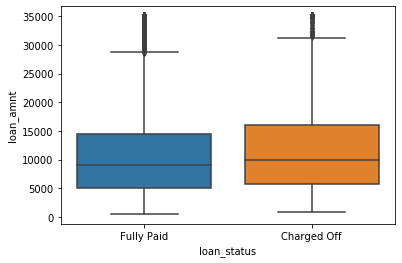

In [441]:
sns.boxplot(x=lending_data['loan_status'], y=lending_data['loan_amnt'])

In [442]:
#biining of feature to get better insights
lending_data['loan_amnt_bin'] = bin_feature(lending_data['loan_amnt'], 5000)

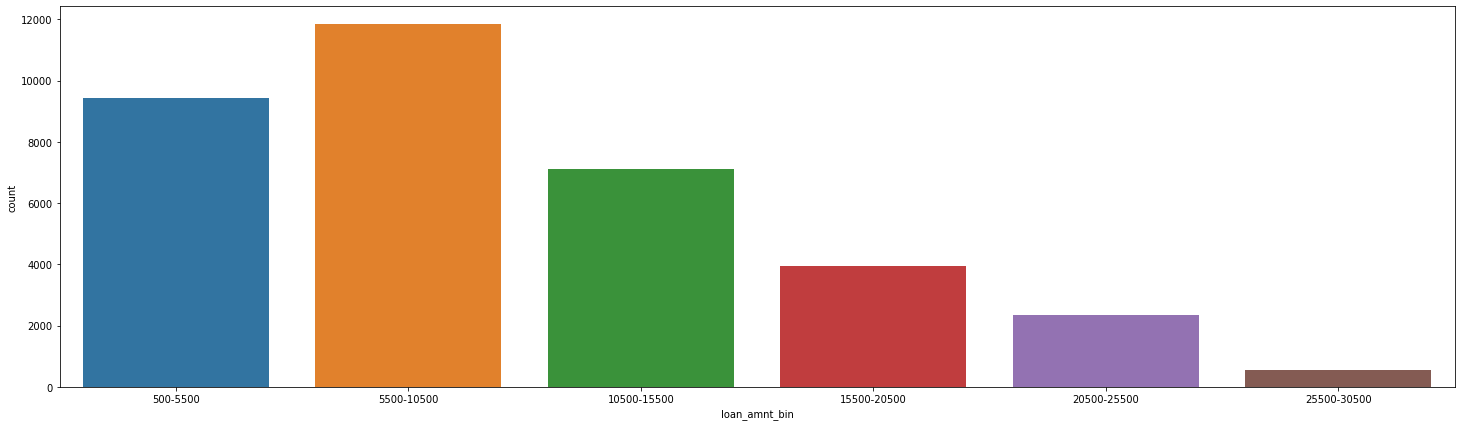

In [443]:
plt.figure(figsize=[25,7])
sns.countplot(lending_data['loan_amnt_bin'])
plt.show() #loan amount is more in range 5500-10500

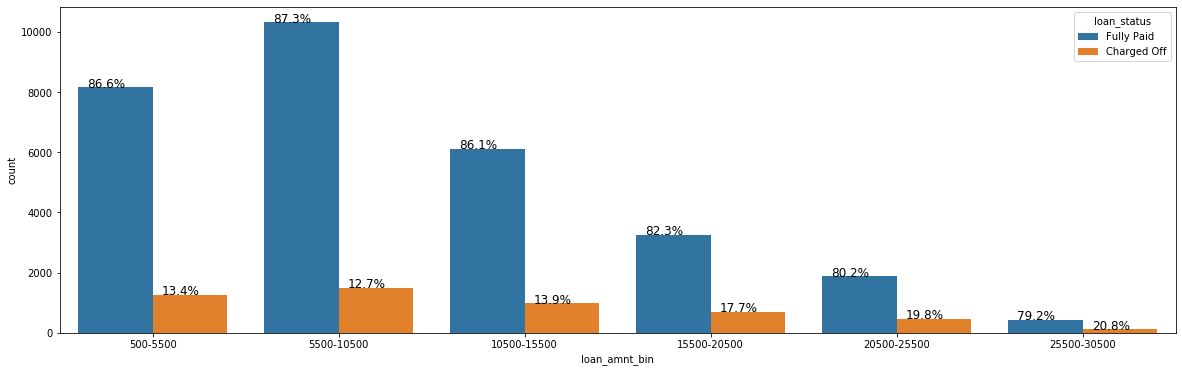

In [444]:
countplot_with_hue('loan_amnt_bin',(20,6))
#With increasing loan amount, chargedOff percentage is also increasing

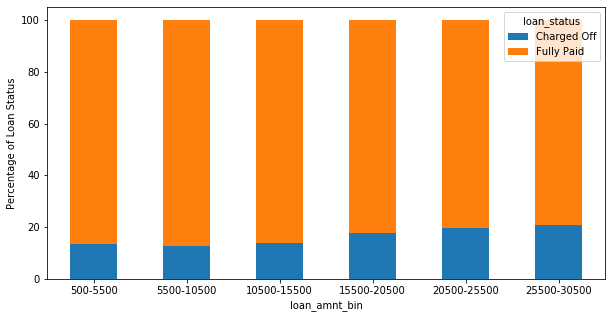

In [445]:
#stacked plot
plot_stacked_bar('loan_amnt_bin', (10,5))

#### funded_amnt - loan_status Analysis

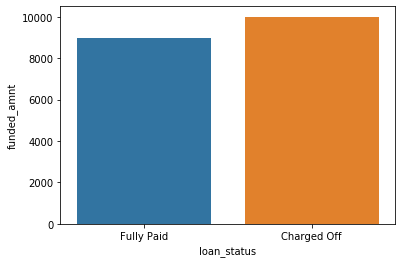

In [446]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['funded_amnt'], estimator=np.median)

In [447]:
#binning funded amount to analyse better
lending_data['funded_amnt_bin'] = bin_feature(lending_data['funded_amnt'], 5000)

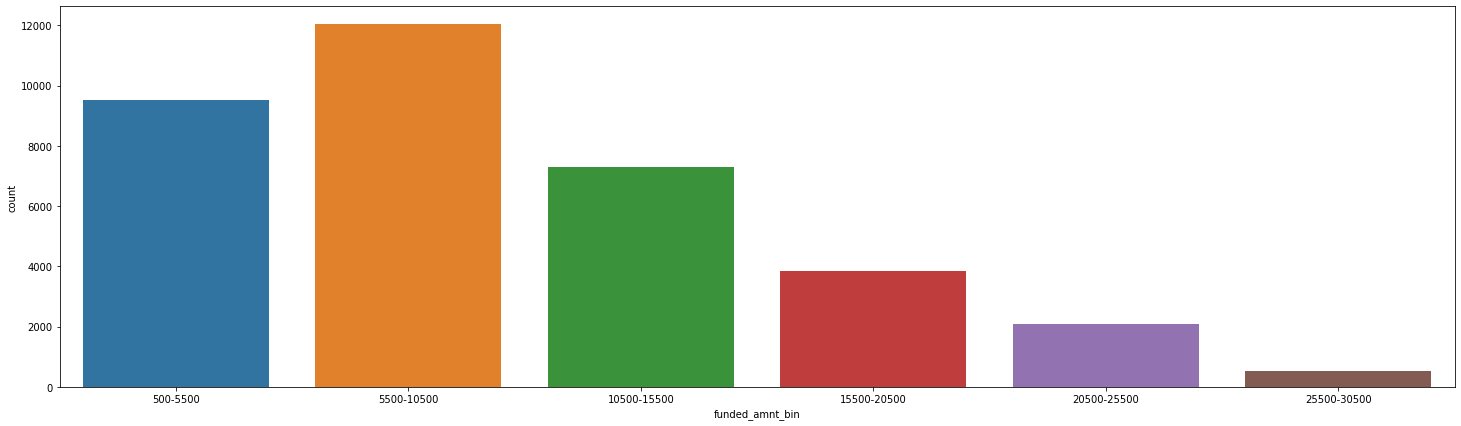

In [448]:
plt.figure(figsize=[25,7])
sns.countplot(lending_data['funded_amnt_bin'])
plt.show() #similar trend as observed in loan amount

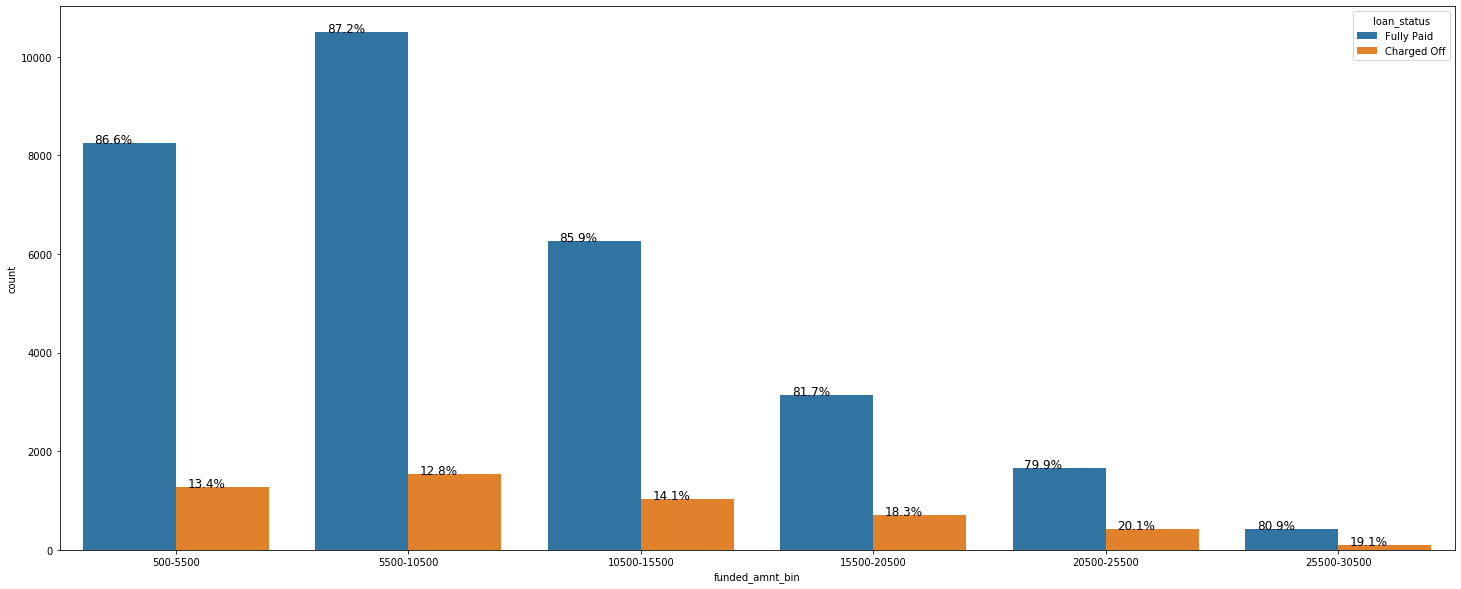

In [449]:
countplot_with_hue('funded_amnt_bin',(25,10))
#With increasing funded amount, chargedOff percentage is also increasing

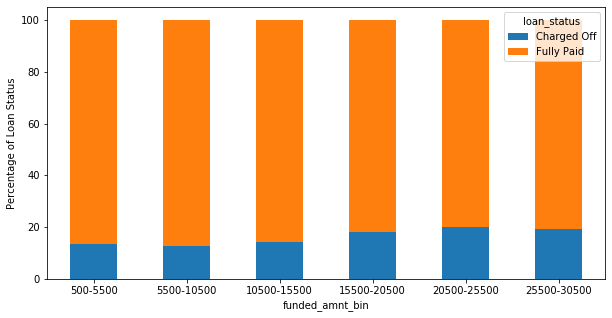

In [450]:
#stacked plot
plot_stacked_bar('funded_amnt_bin', (10,5))

#### funded_amnt_inv - loan_status Analysis

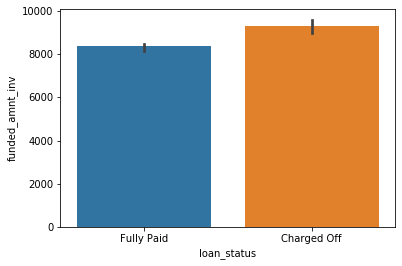

In [451]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['funded_amnt_inv'], estimator=np.median)

In [452]:
#binning funded amount to analyse better
lending_data['funded_amnt_inv_bin'] = bin_feature(lending_data['funded_amnt_inv'], 5000)

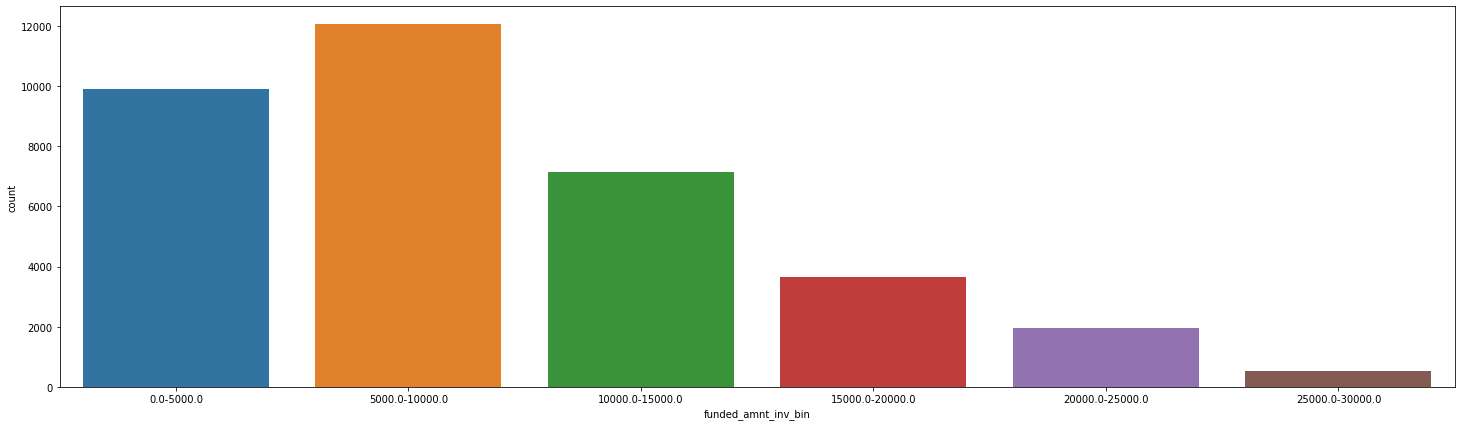

In [453]:
plt.figure(figsize=[25,7])
sns.countplot(lending_data['funded_amnt_inv_bin'])
plt.show() #similar trend as observed in loan amount

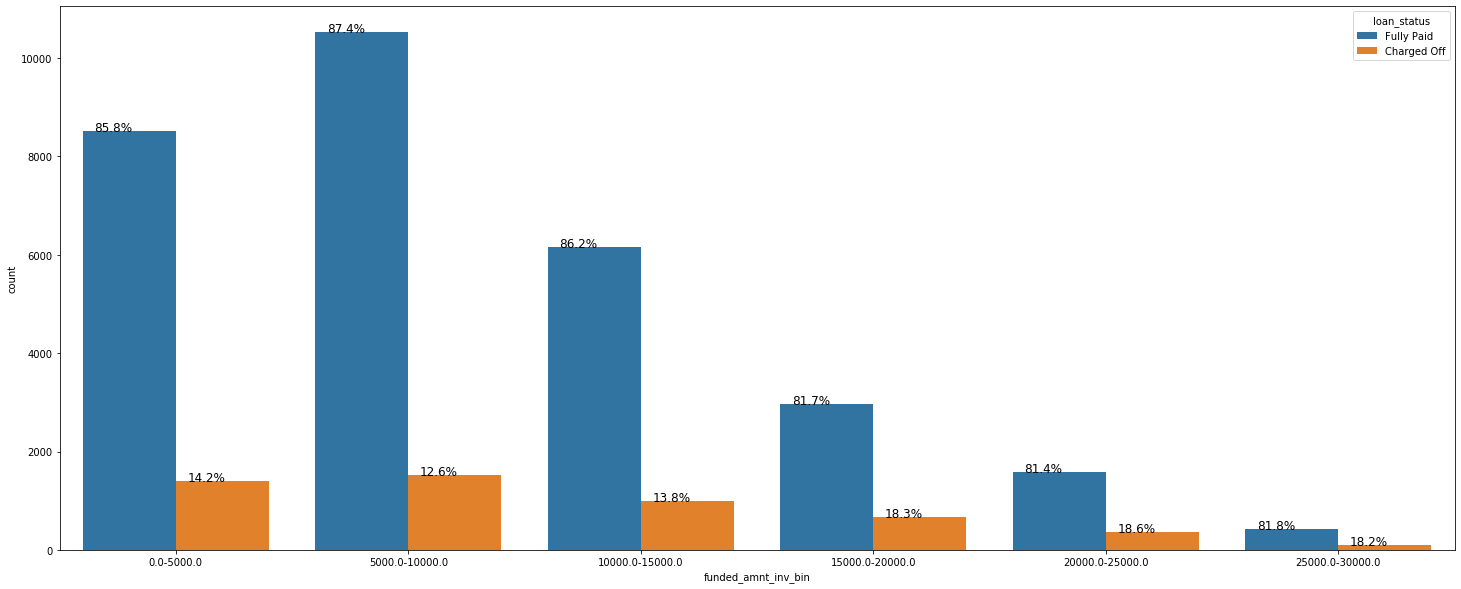

In [454]:
countplot_with_hue('funded_amnt_inv_bin',(25,10))
#With increasing funded amount, chargedOff percentage is also increasing

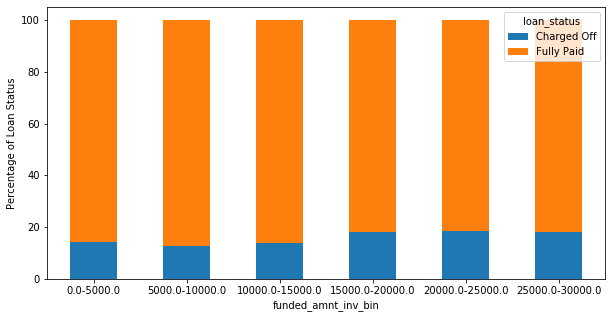

In [455]:
#stacked plot
plot_stacked_bar('funded_amnt_inv_bin', (10,5))

### Observation based on loan Amount, funded Amount and funded Amount Inv. 

As these amounts increases then chances of loan getting charged Off also increases.Key column is Loan Amount, if loan amount is higher then funded amount and funded amount by investors will be more.

#### term - loan status Analysis

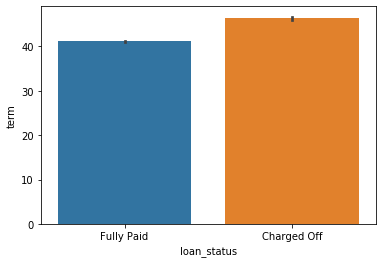

In [456]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['term'], estimator=np.mean)

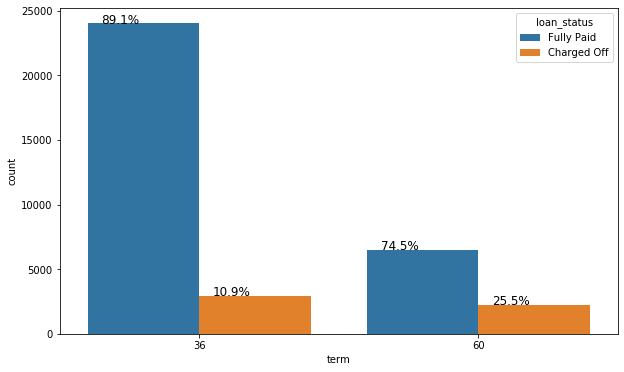

In [457]:
countplot_with_hue('term',(10,6))

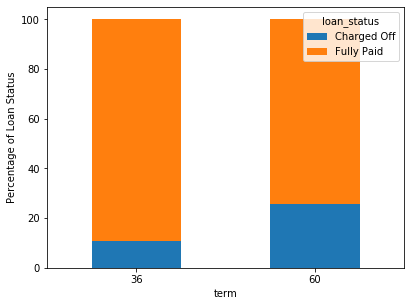

In [458]:
#stacked plot
plot_stacked_bar('term')

### Observation based on Term 

Loans having high tenure have more chances of getting charged off

#### int_rate - loan_status Analysis

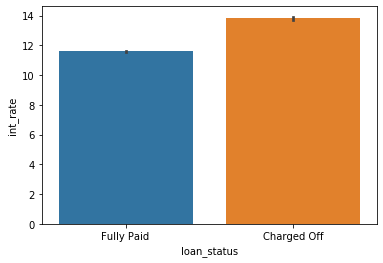

In [459]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['int_rate'], estimator=np.mean)

In [460]:
#binning interest rate to analyse better
lending_data['int_rate_bin'] = bin_feature(lending_data['int_rate'], 2)

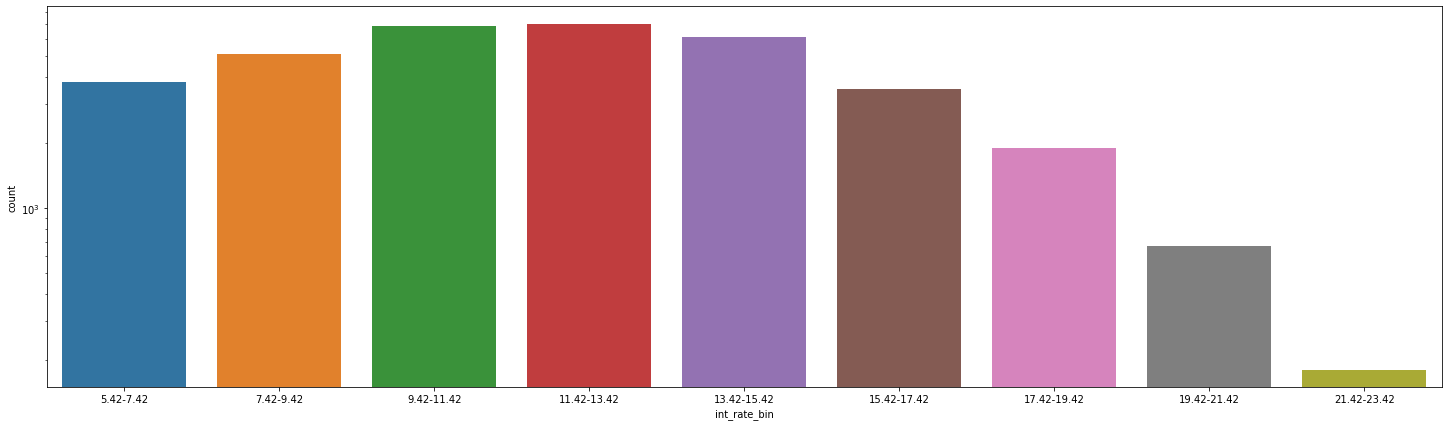

In [461]:
plt.figure(figsize=[25,7])
g = sns.countplot(lending_data['int_rate_bin'])
g.set_yscale("log")
plt.show()

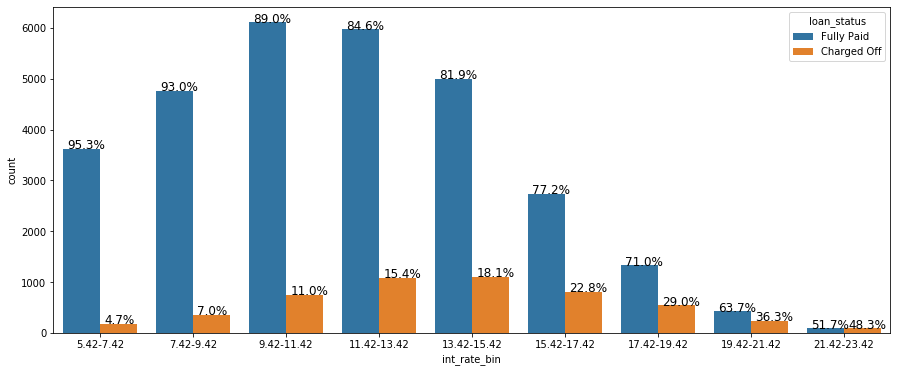

In [462]:
countplot_with_hue('int_rate_bin', (15,6))

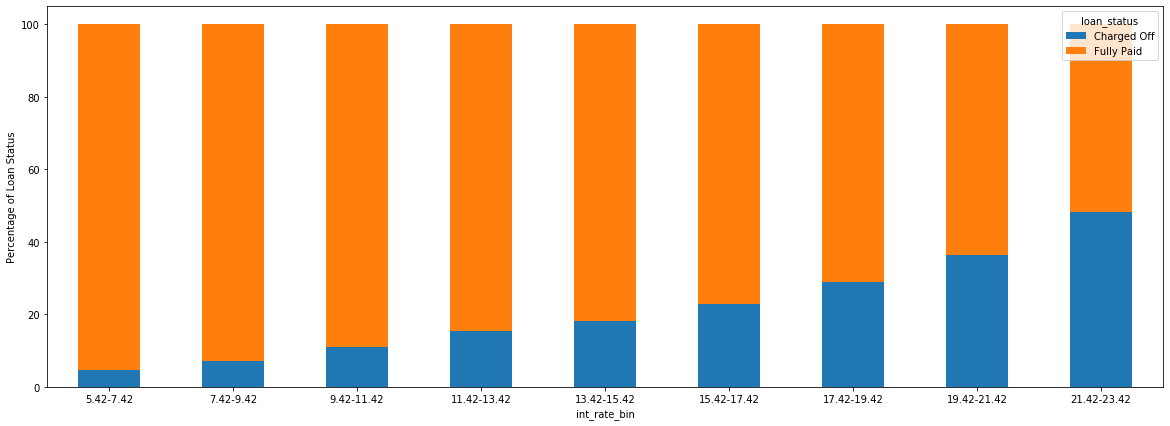

In [463]:
#stacked plot
plot_stacked_bar('int_rate_bin', (20,7))

### Observation based on Interest Rate 

As Interest rate is increasing , charged Off percentage is also increasing as compared to fully paid. Interest Rate has impact on loans getting defaulted

#### Installment - loan_status Analysis

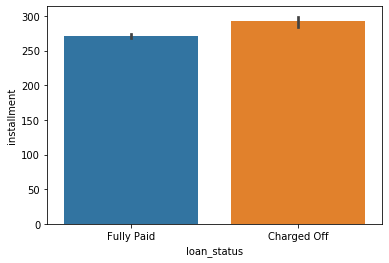

In [464]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['installment'], estimator=np.median)

In [465]:
#binning installments to analyse better
lending_data['installment_bin'] = bin_feature(lending_data['installment'], 300)

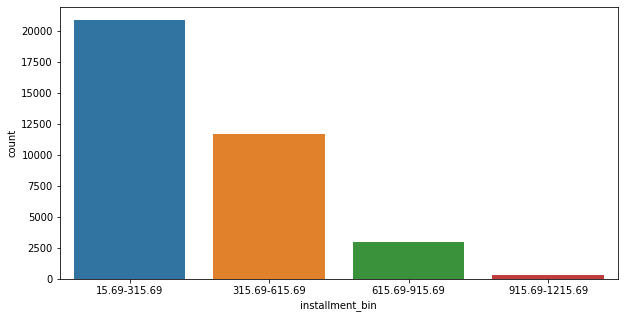

In [466]:
plt.figure(figsize=[10,5])
sns.countplot(lending_data['installment_bin'])
plt.show()

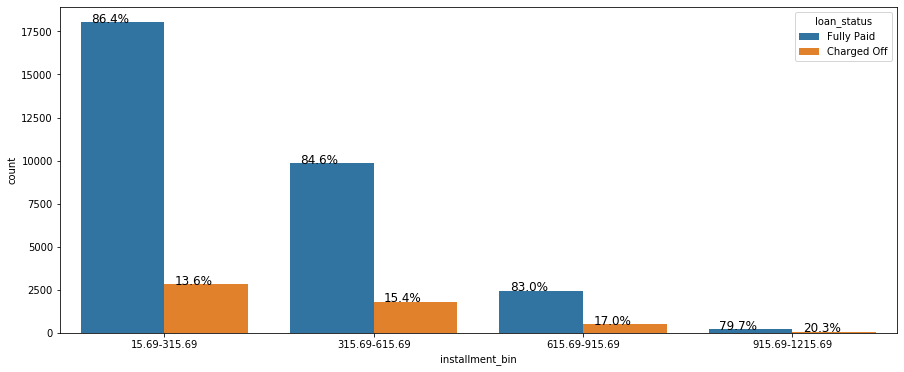

In [467]:
countplot_with_hue('installment_bin',(15,6))

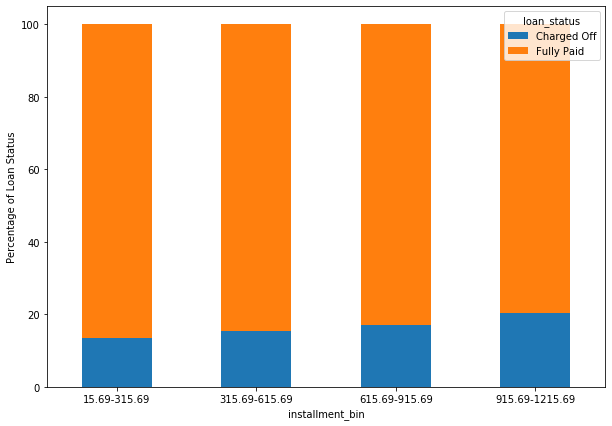

In [468]:
#stacked plot
plot_stacked_bar('installment_bin', (10,7))

### Observation based on Installment 

On increasing the number of installments, charged off loans are also increasing.

#### grade - loan_status Analysis

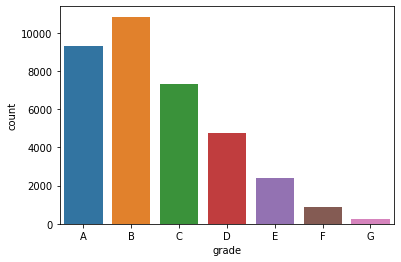

In [469]:
sns.countplot(x=lending_data['grade'].sort_values())

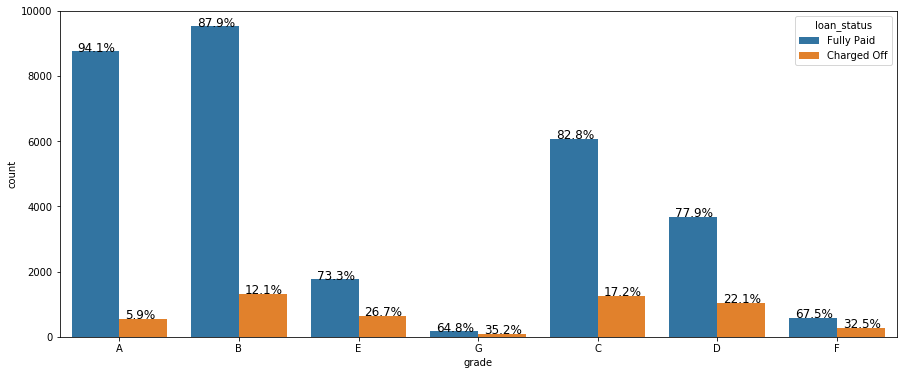

In [470]:
countplot_with_hue('grade', (15,6))

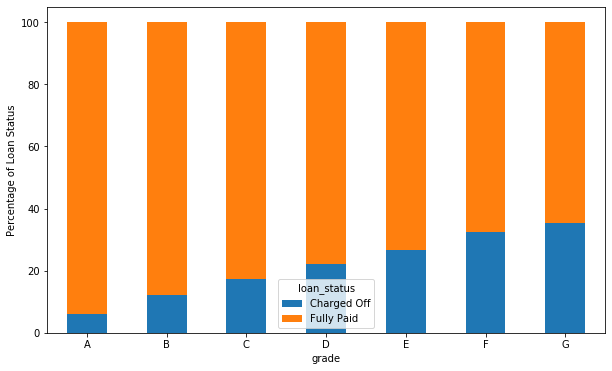

In [471]:
#stacked plot
plot_stacked_bar('grade', (10,6))

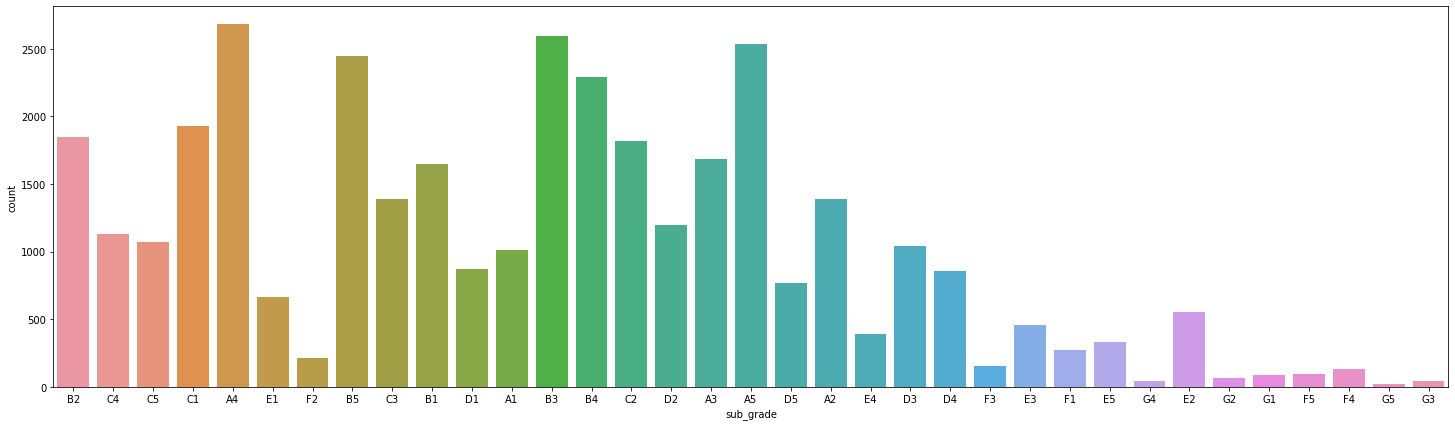

In [472]:
plt.figure(figsize=[25,7])
sns.countplot(x=lending_data['sub_grade'])
plt.show()

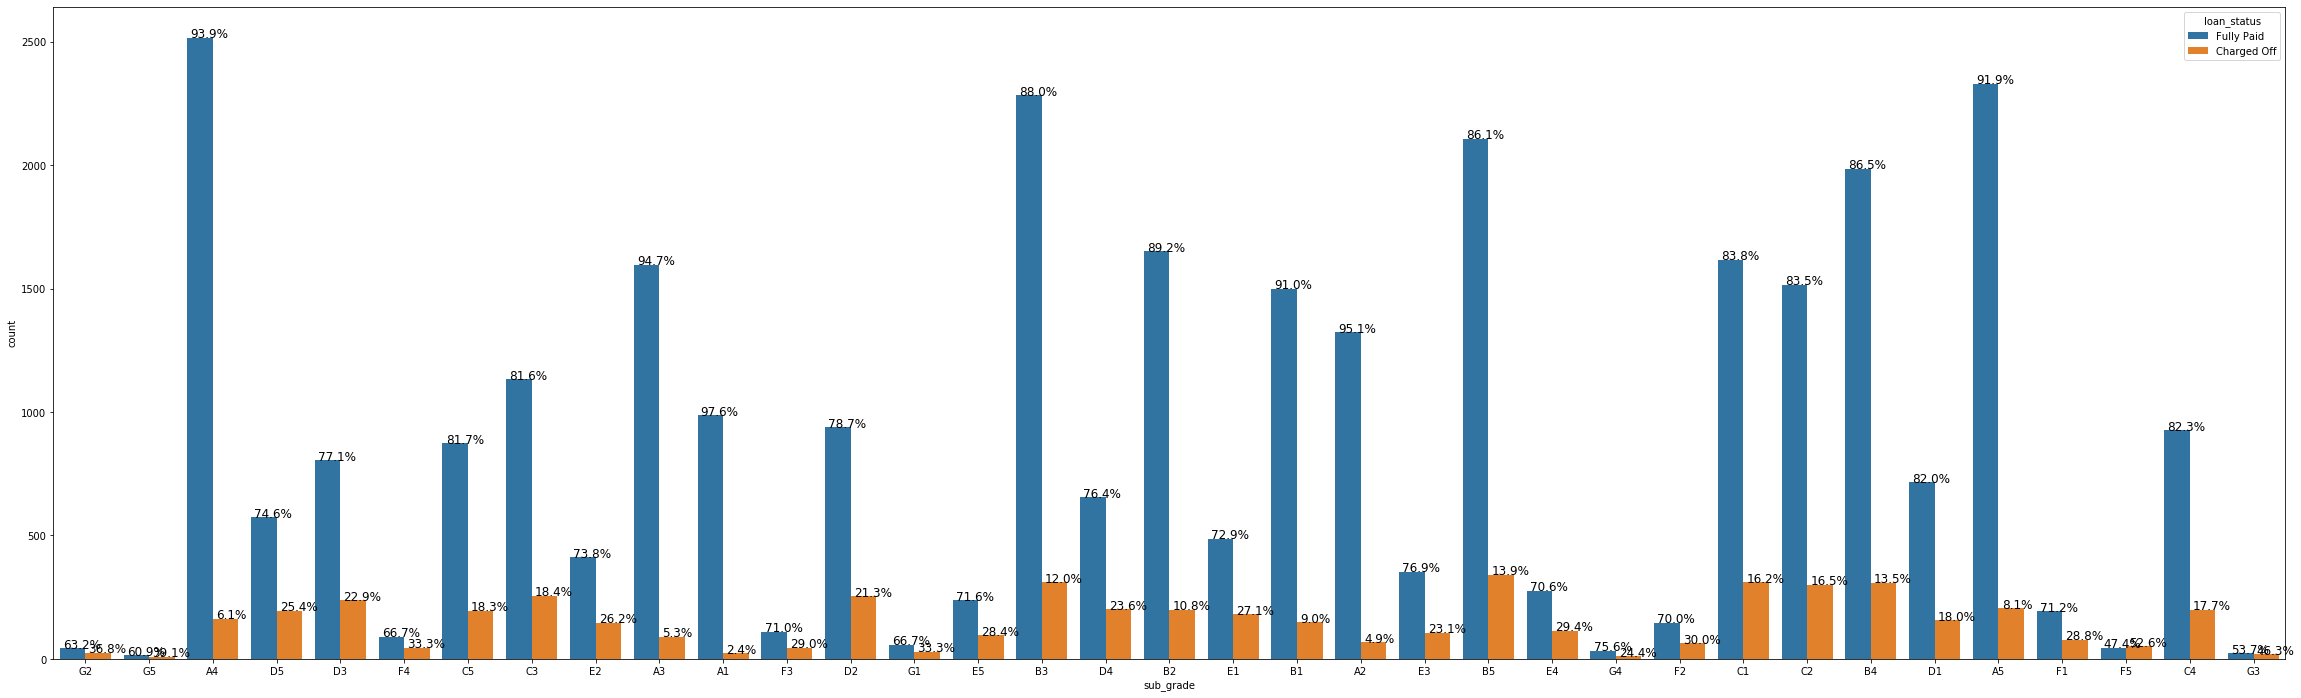

In [473]:
countplot_with_hue('sub_grade', (40,12))
#not of much relevance due to lack of proper visibility

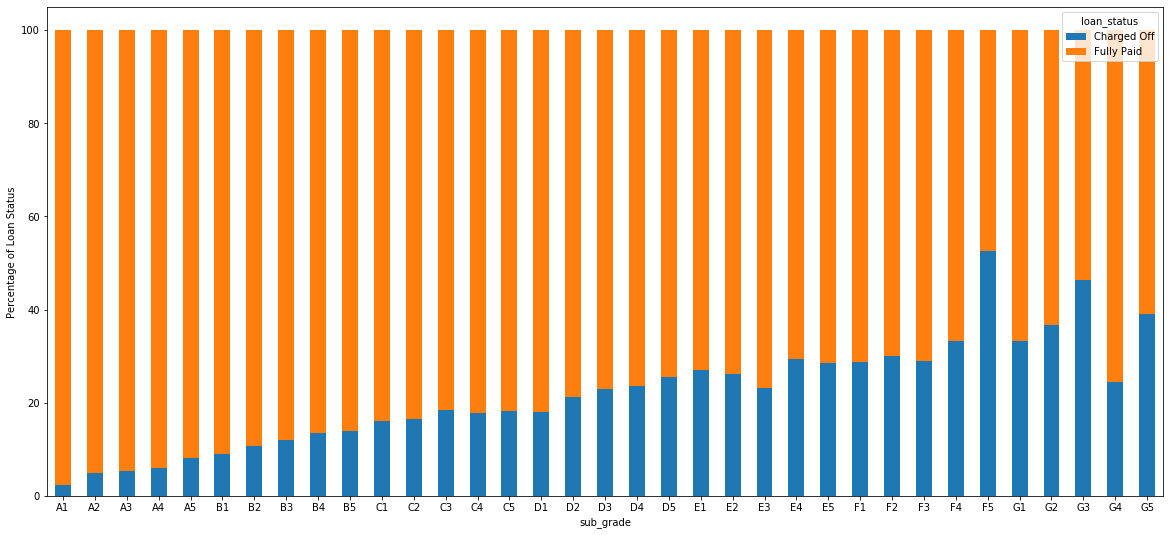

In [474]:
#stacked plot
plot_stacked_bar('sub_grade',(20,9))

### Observation based on Grade and Sub-Grade 

Loans having grade A,B and C are safe. As grade/sub-grade of loan is increasing, charged Off chances are also increasing.

#### emp_length - loan_status Analysis

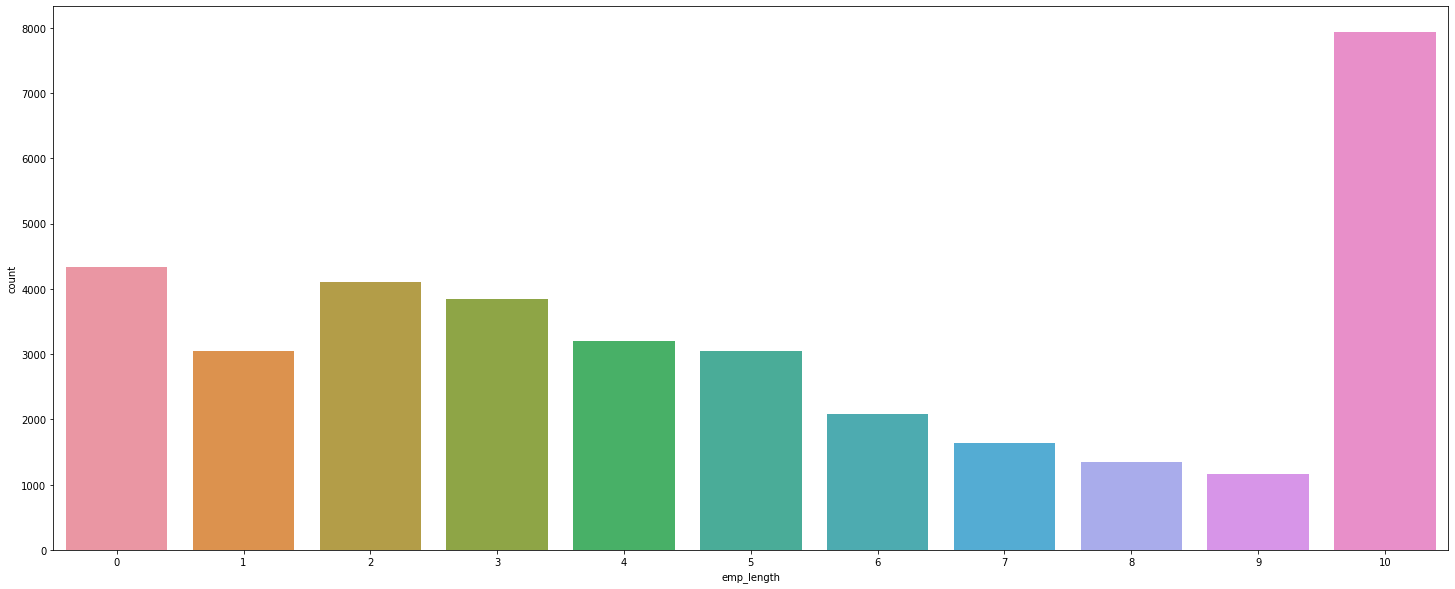

In [475]:
plt.figure(figsize=[25,10])
sns.countplot(x=lending_data['emp_length'])
plt.show()

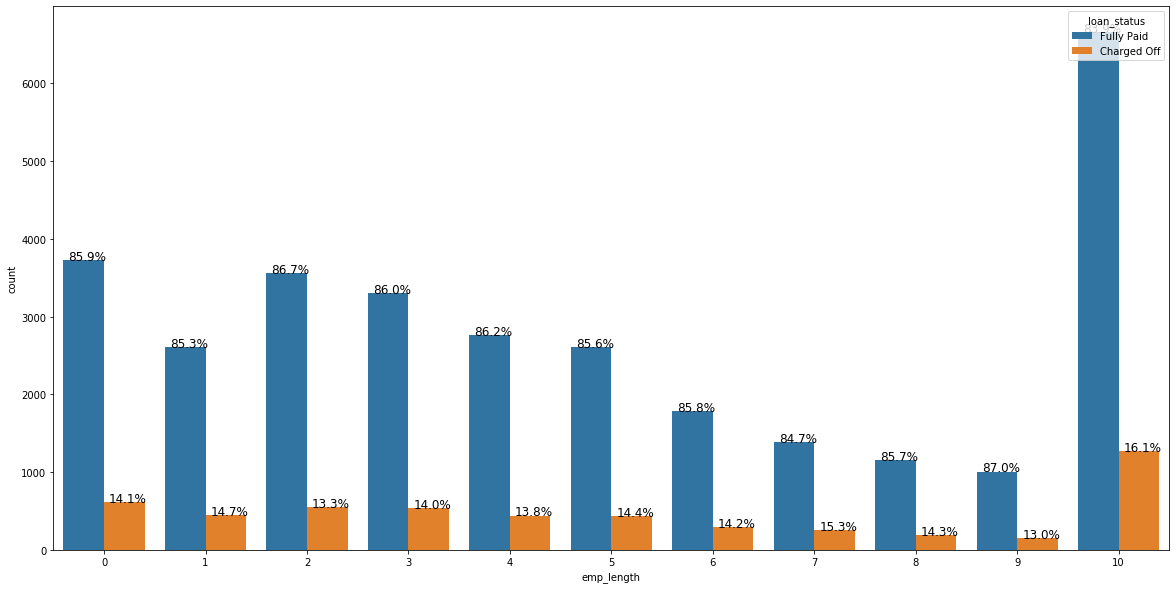

In [476]:
countplot_with_hue('emp_length', (20,10))

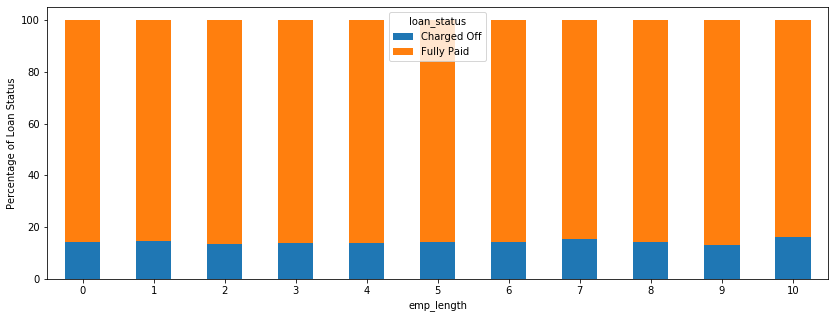

In [477]:
#stacked plot
plot_stacked_bar('emp_length',(14,5))

### Observation based on emp length 

There is no impact of employee length on loan getting charged off. Trends are similar in every experience bracket.

#### home_ownership - loan_status Analysis

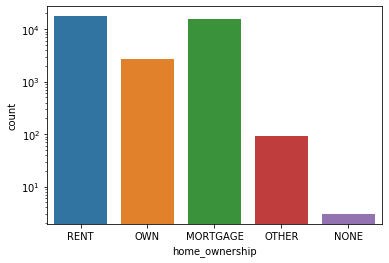

In [478]:
g = sns.countplot(x=lending_data['home_ownership'])
g.set_yscale("log")

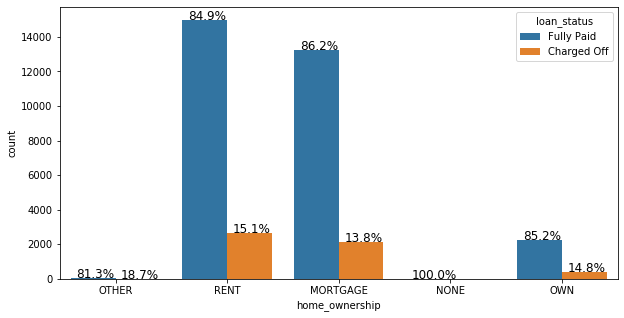

In [479]:
countplot_with_hue('home_ownership', (10,5))

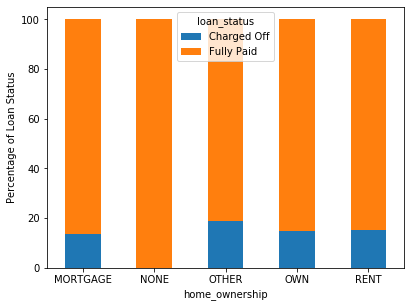

In [480]:
#stacked plot
plot_stacked_bar('home_ownership')

### Observation based on home ownership 

Customers who belong to None i.e do not have any home ownership are able to fully re-pay the loan as compared to others.Charged Off % is almost same for home ownerships other than 'None'.

#### annual_inc - loan_status Analysis

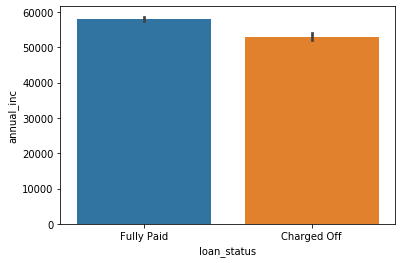

In [481]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['annual_inc'], estimator=np.median)

In [482]:
#binning annual income
lending_data['annual_inc_bin'] = bin_feature(lending_data['annual_inc'], 20000)

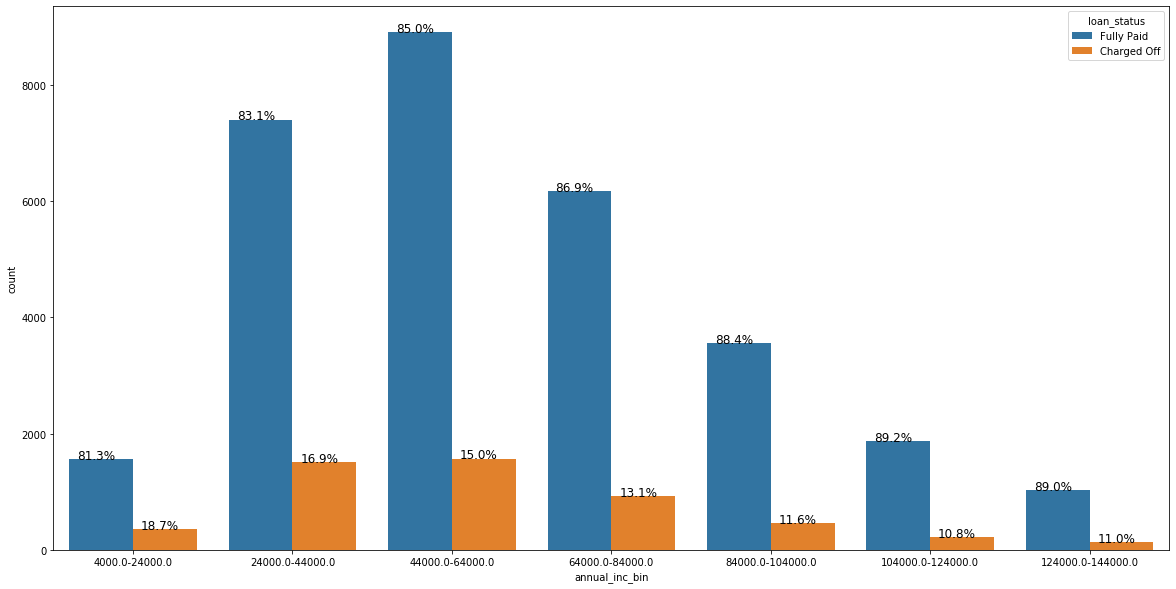

In [483]:
countplot_with_hue('annual_inc_bin', (20,10))

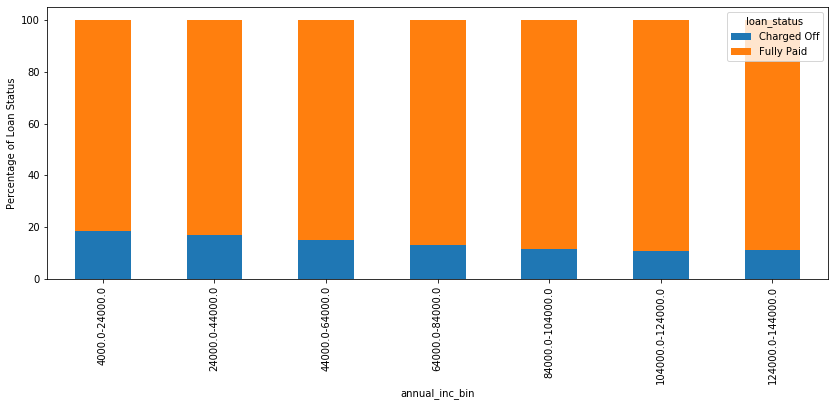

In [484]:
#stacked plot
plot_stacked_bar('annual_inc_bin',(14,5),None)

### Observation based on annual income 

Lower Income range have more chances of getting charged Off. As income is increasing, charged Off % is decreasing.

#### verification_status - loan_status Analysis

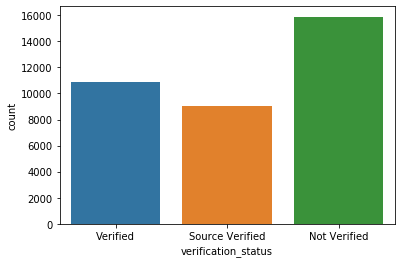

In [485]:
sns.countplot(x=lending_data['verification_status'])

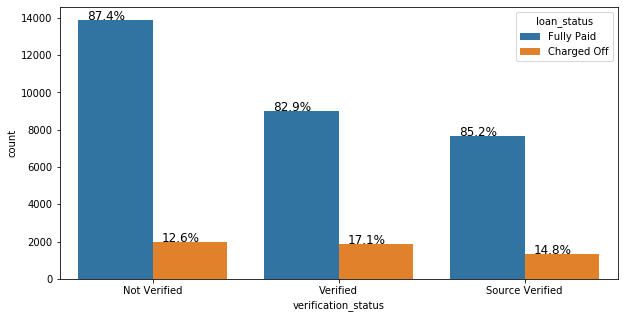

In [486]:
countplot_with_hue('verification_status', (10,5))

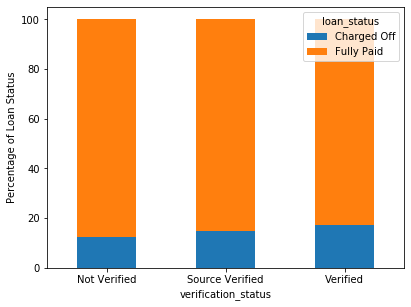

In [487]:
#stacked plot
plot_stacked_bar('verification_status')

### Observation Based on verification status 

Similar impact on all the values.

#### issue_d - loan_status Analysis

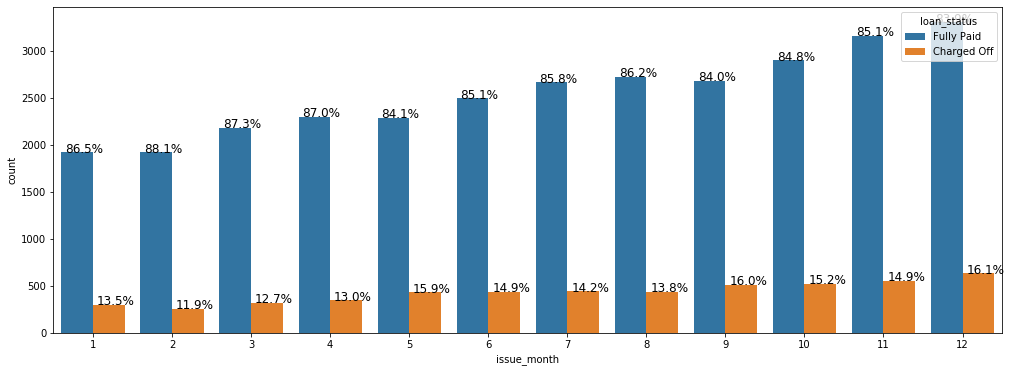

In [488]:
#issue_month Analysis
lending_data['issue_month']= lending_data['issue_d'].apply(lambda x : pd.to_datetime(x, format='%b-%y').month)
countplot_with_hue('issue_month', (17,6))

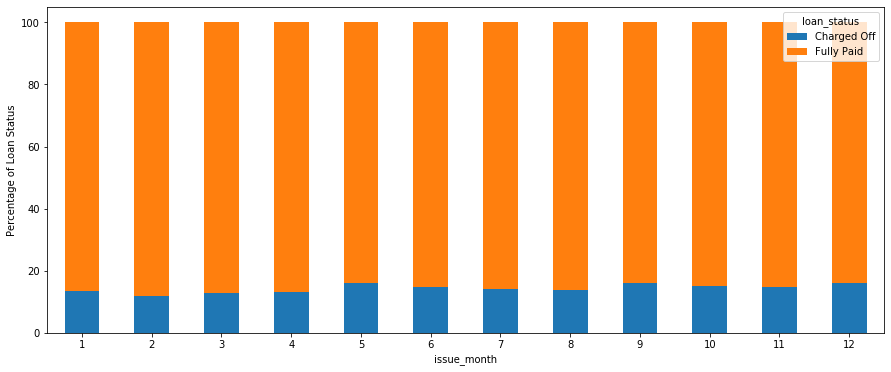

In [489]:
plot_stacked_bar('issue_month', (15,6))

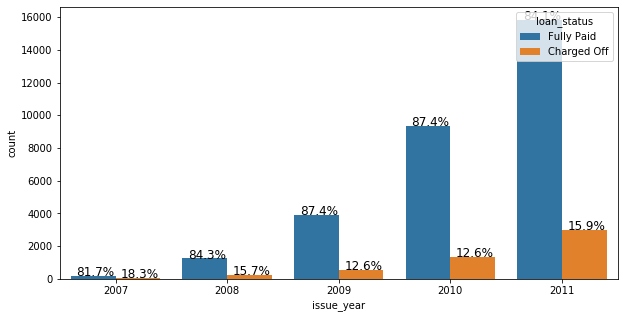

In [490]:
#issue_year Analysis
lending_data['issue_year']= lending_data['issue_d'].apply(lambda x : pd.to_datetime(x, format='%b-%y').year)
countplot_with_hue('issue_year', (10,5))

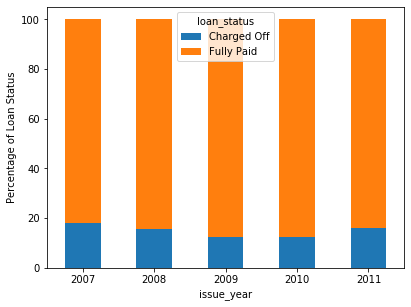

In [491]:
plot_stacked_bar('issue_year')

### Observation based on issue date 

Not found any trend/pattern on charged Off percentage. Seems same for all values. 

#### purpose - loan_status Analysis

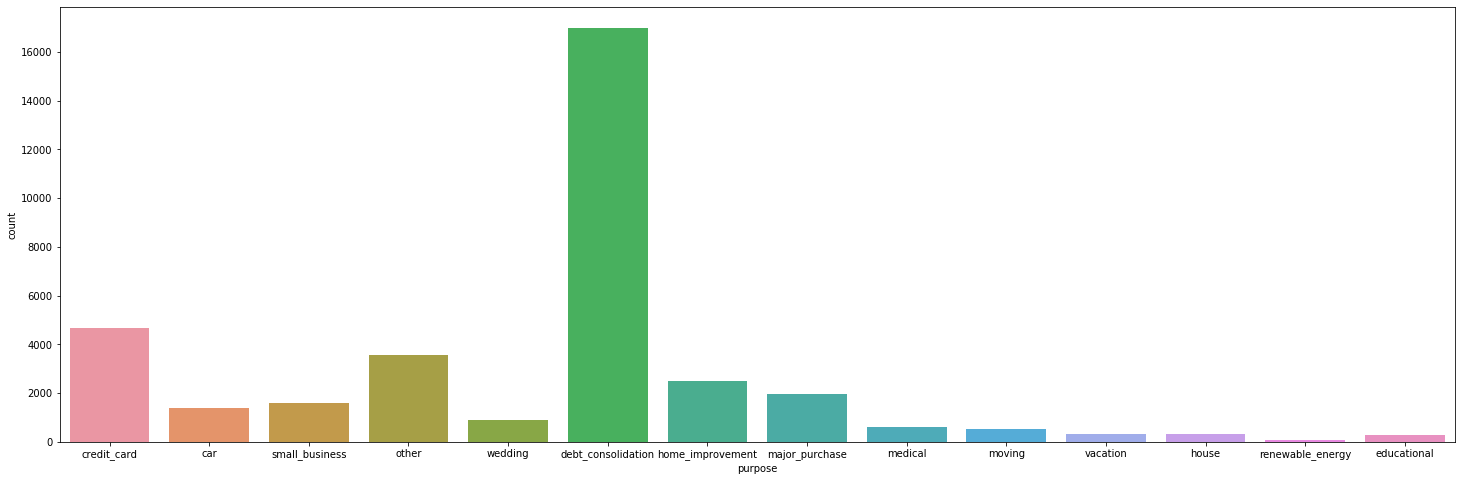

In [492]:
plt.figure(figsize=[25,8])
sns.countplot(x=lending_data['purpose'])
plt.show()

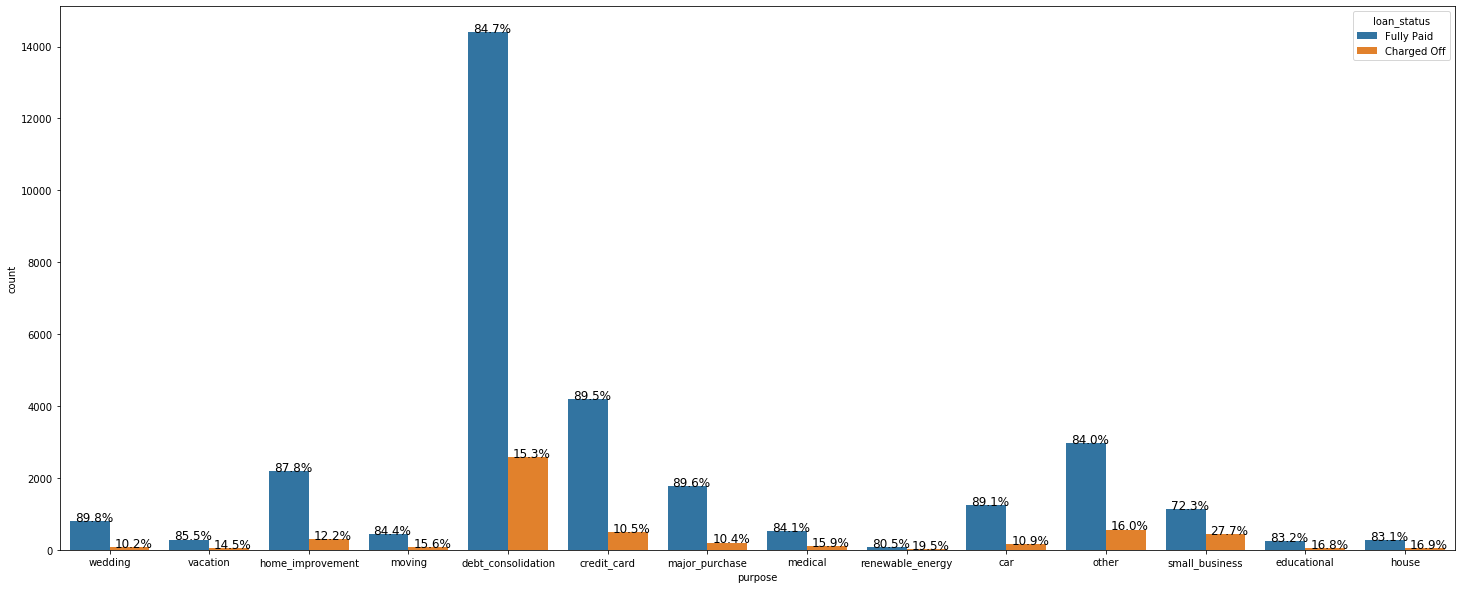

In [493]:
countplot_with_hue('purpose', (25,10))

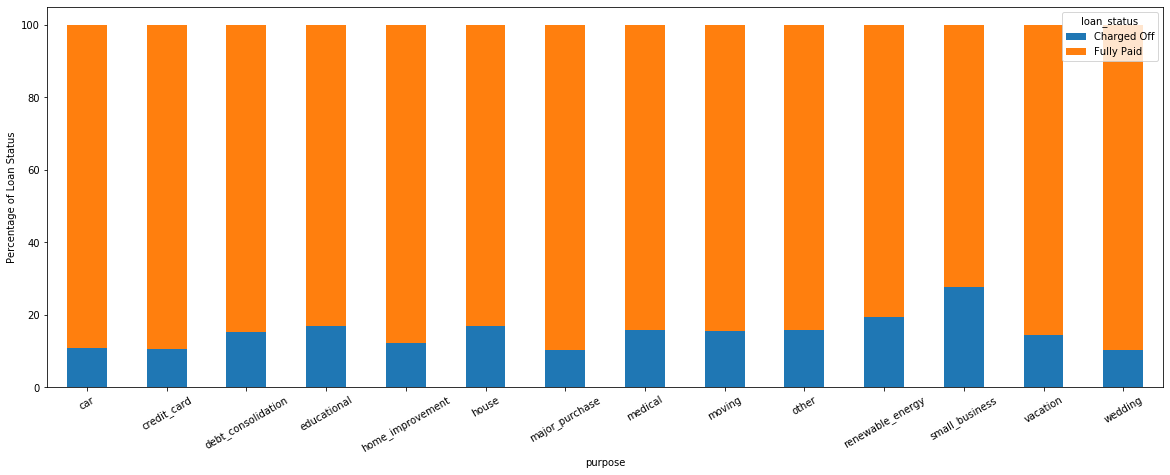

In [494]:
plot_stacked_bar('purpose', (20,7), 30)

### Observation based on purpose 

Loans for Small Business purpose have high chances of getting charged off.

#### addr_state - loan_status Analysis

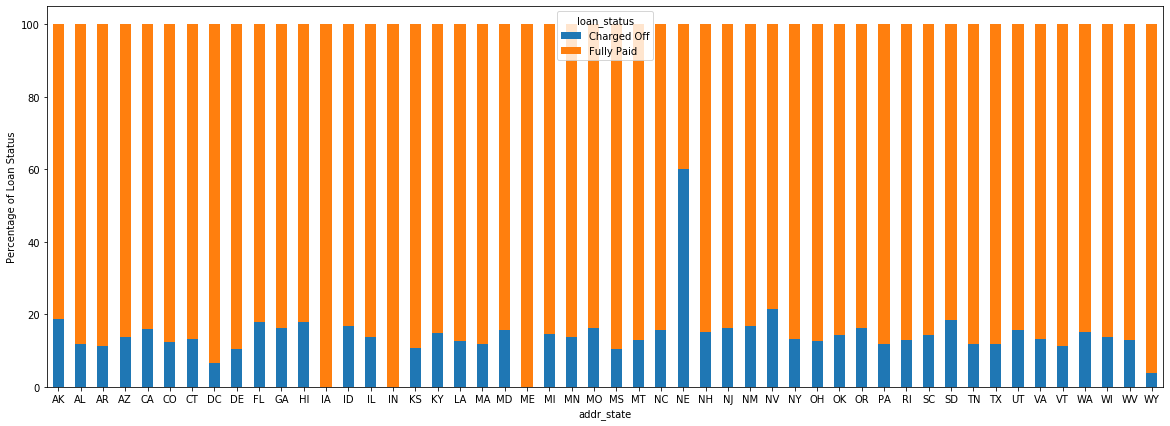

In [495]:
#bar plot with hue wont be much effected as unique values are more
#stacked plot
plot_stacked_bar('addr_state',(20,7))

### Observation based on address state 

Loan applications from NE state code has higher chances of getting charged Off. Rest charged off pattern is similar in all states.

#### dti - loan_status Analysis

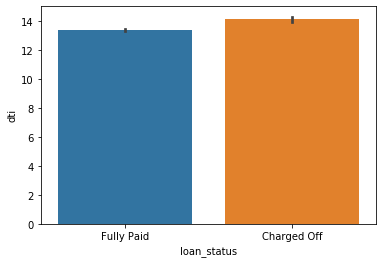

In [496]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['dti'], estimator=np.mean)

In [497]:
#binning dti for better analysis
lending_data['dti_bin'] = bin_feature(lending_data['dti'], 3)

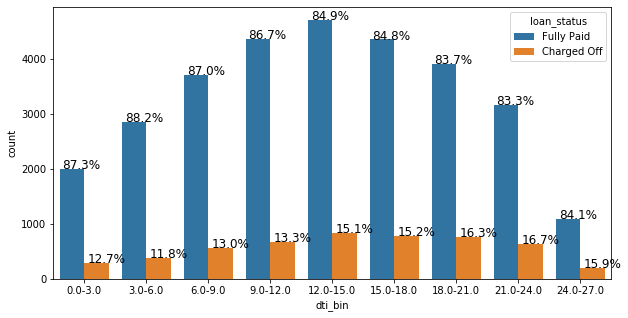

In [498]:
countplot_with_hue('dti_bin', (10,5))

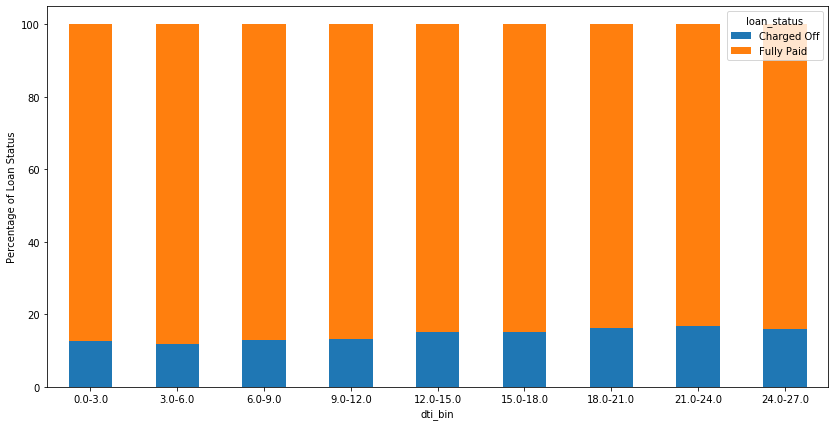

In [499]:
plot_stacked_bar('dti_bin',(14,7))

### Observation based on debt to income ratio 

On increasing the dti, charged off percentage is also increasing although the increase is minor.

#### delinq_2yrs - loan_status Analysis

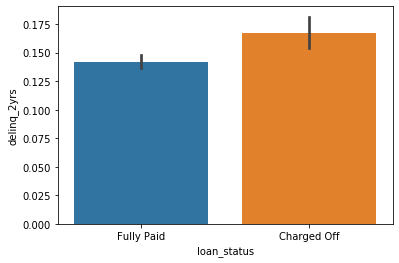

In [500]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['delinq_2yrs'], estimator=np.mean)

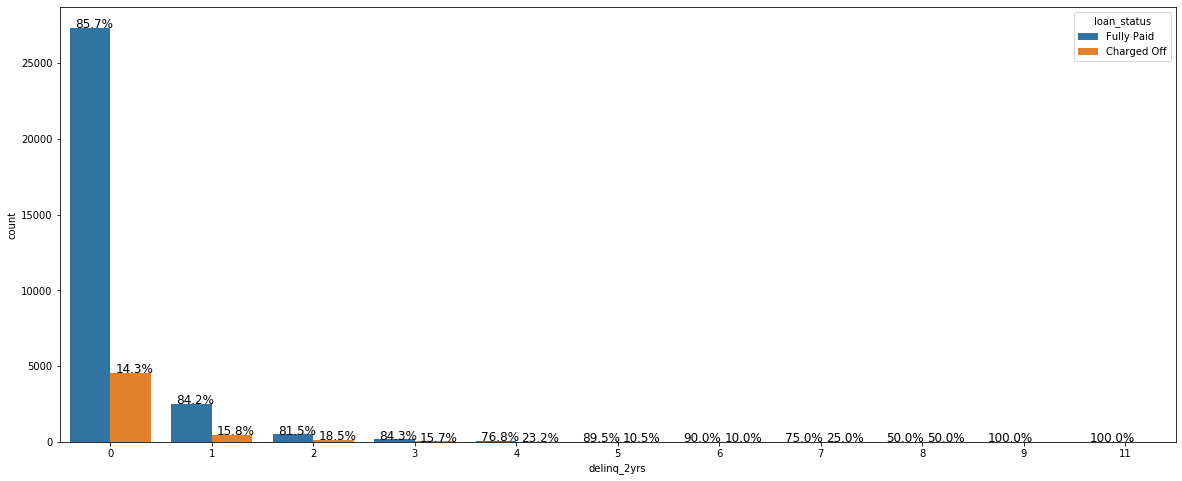

In [501]:
countplot_with_hue('delinq_2yrs', (20,8))

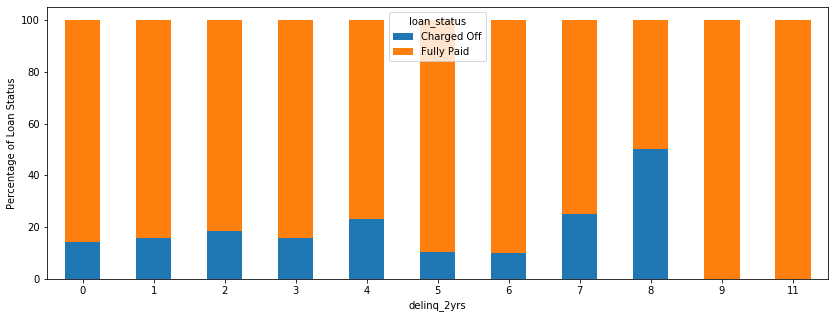

In [502]:
plot_stacked_bar('delinq_2yrs', (14,5))

### Observation based on  delinquent in last 2yrs

There is no pattern with charged Off %. Customers who are deliquent 9/11 times were able to fully repay the loan.

#### inq_last_6mths - loan_status Analysis

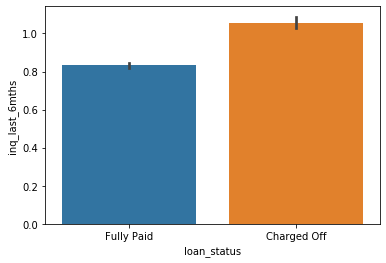

In [503]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['inq_last_6mths'], estimator=np.mean)

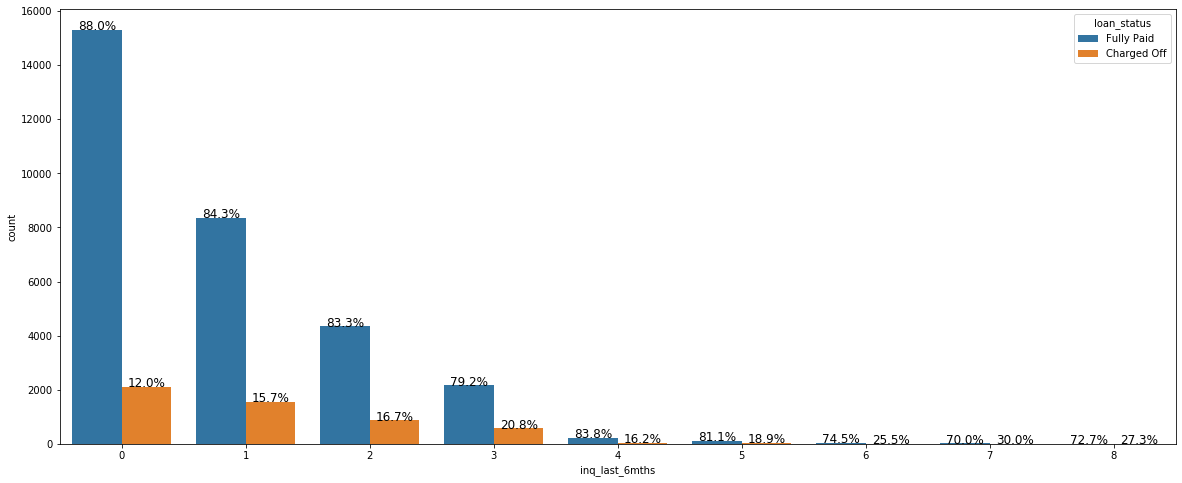

In [504]:
countplot_with_hue('inq_last_6mths', (20,8))

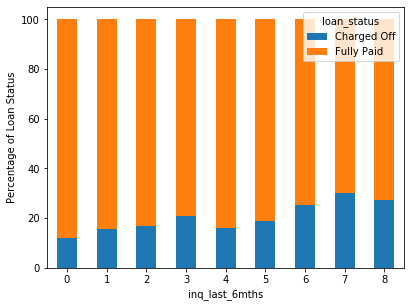

In [505]:
plot_stacked_bar('inq_last_6mths')

### Observation based on  inq_last_6mths

No pattern observed.Charged Off loans are increasing/decreasing randomly.

#### open_acc - loan_status Analysis

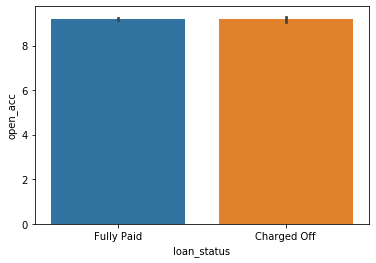

In [506]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['open_acc'], estimator=np.mean)

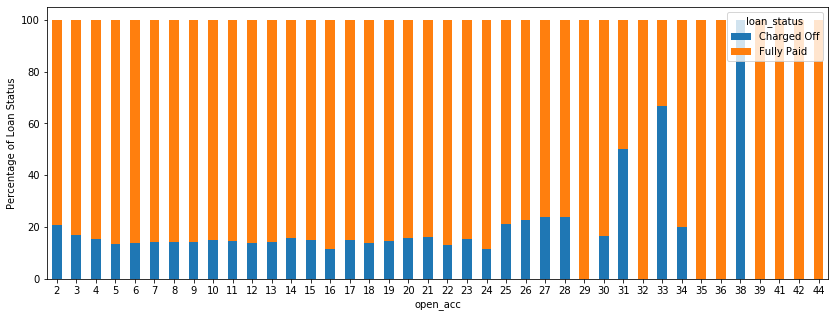

In [507]:
#Categories are more so better to observe the data using stacked plot
plot_stacked_bar('open_acc',(14,5))

### Observation based on  open_acc

No pattern observed.Charged Off loans are increasing/decreasing randomly.

#### revol_bal - loan_status Analysis

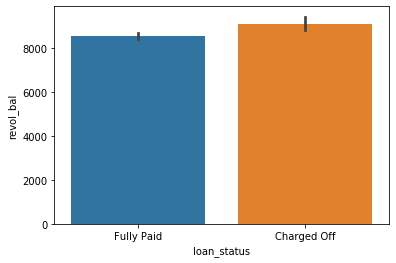

In [508]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['revol_bal'], estimator=np.median)

In [509]:
#binning the feature for better analysis
lending_data['revol_bal_bin'] = bin_feature(lending_data['revol_bal'], 15000)

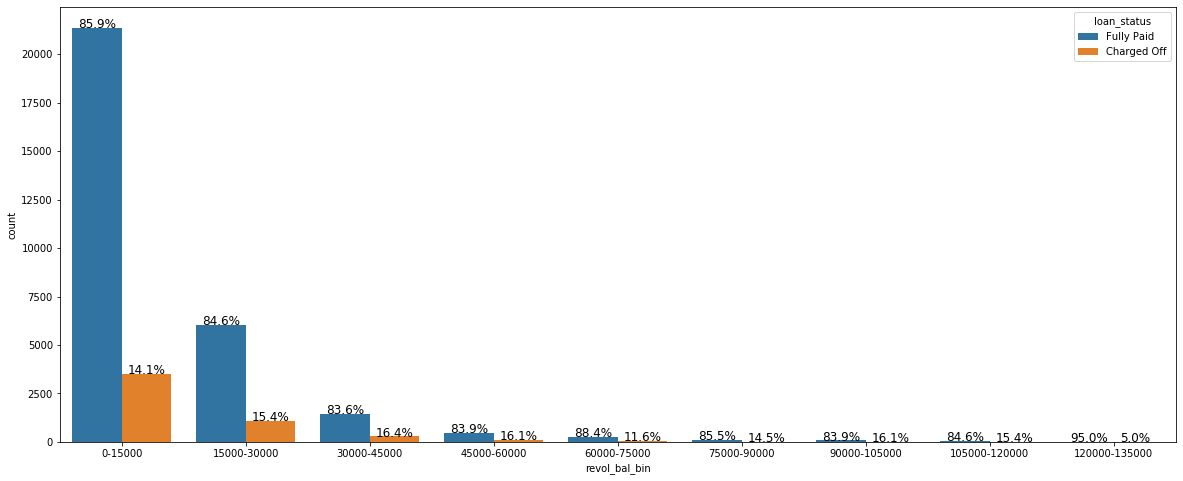

In [510]:
countplot_with_hue('revol_bal_bin', (20,8))

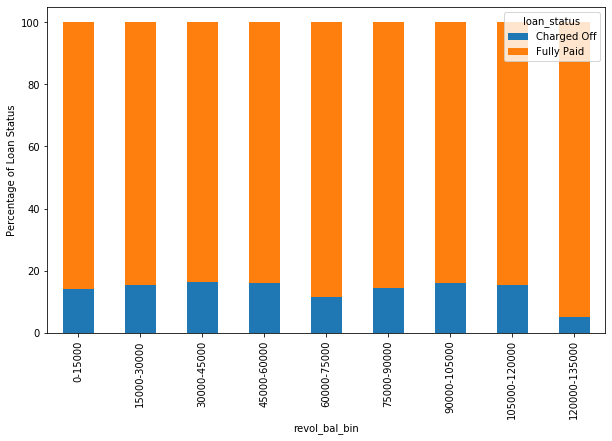

In [511]:
plot_stacked_bar('revol_bal_bin',(10,6), rotation=90)

### Observation based on  revol_bal

No pattern observed.Charged Off loans are increasing/decreasing randomly.

#### revol_util - loan_status Analysis

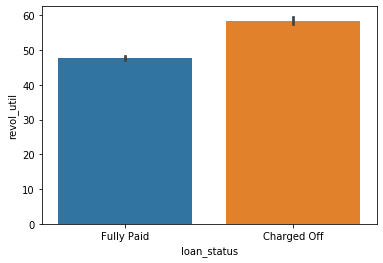

In [512]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['revol_util'], estimator=np.median)

In [513]:
#binning the feature for better analysis
lending_data['revol_util_bin'] = bin_feature(lending_data['revol_util'], 10)

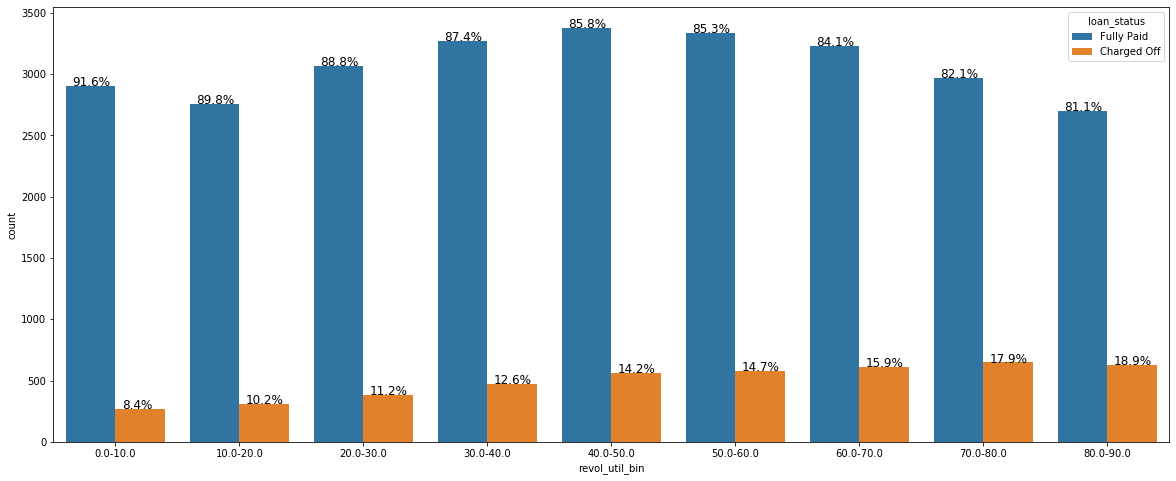

In [514]:
countplot_with_hue('revol_util_bin', (20,8))

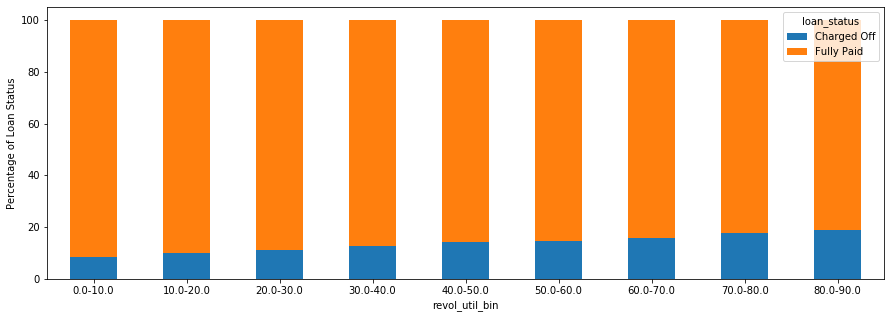

In [515]:
plot_stacked_bar('revol_util_bin', (15,5))

### Observation based on  revol_util

As values are increasing, charged off loans are also increasing. It is clearly visible that the feature is directly propotional to getiing charged Off.

#### total_acc - loan_status Analysis

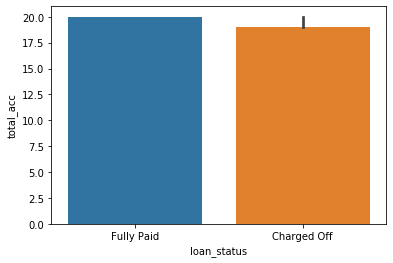

In [516]:
sns.barplot(x=lending_data['loan_status'], y=lending_data['total_acc'], estimator=np.median)

In [517]:
#binning the feature for better analysis
lending_data['total_acc_bin'] = bin_feature(lending_data['total_acc'], 10)

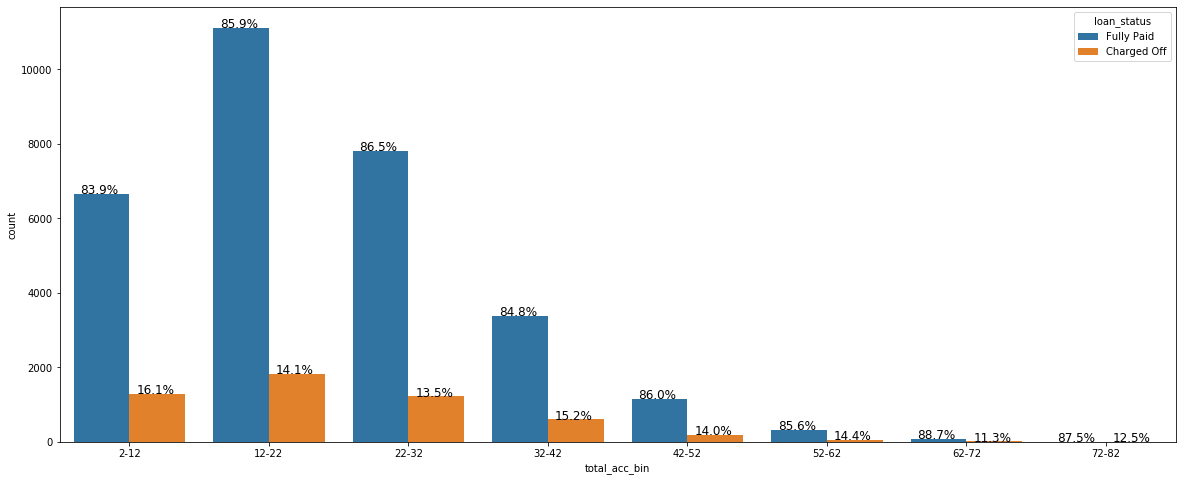

In [518]:
countplot_with_hue('total_acc_bin', (20,8))

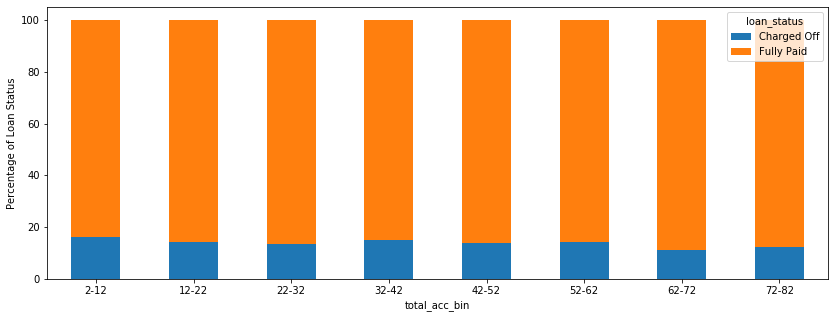

In [519]:
plot_stacked_bar('total_acc_bin',figuresize=(14,5))

### Observation based on  total_acc_bin

No trend observed. Charged off % is same for all ranges.

#### recoveries - loan status Analysis

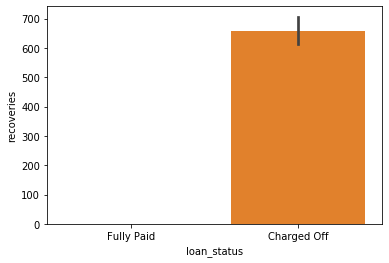

In [520]:
sns.barplot(y=lending_data['recoveries'], x=lending_data['loan_status'], estimator=np.mean)

Only values for charged Off is present which is expected behaviour. This column represents post charged Off loan recovery, thus not useful to predict the default loan beforehand.

#### pub_rec - loan status Analysis 

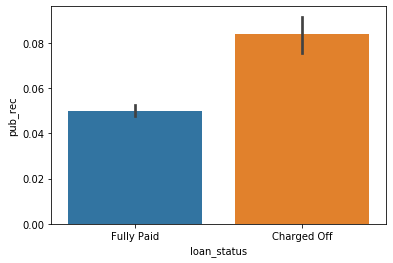

In [521]:
sns.barplot(y=lending_data['pub_rec'], x=lending_data['loan_status'], estimator=np.mean)

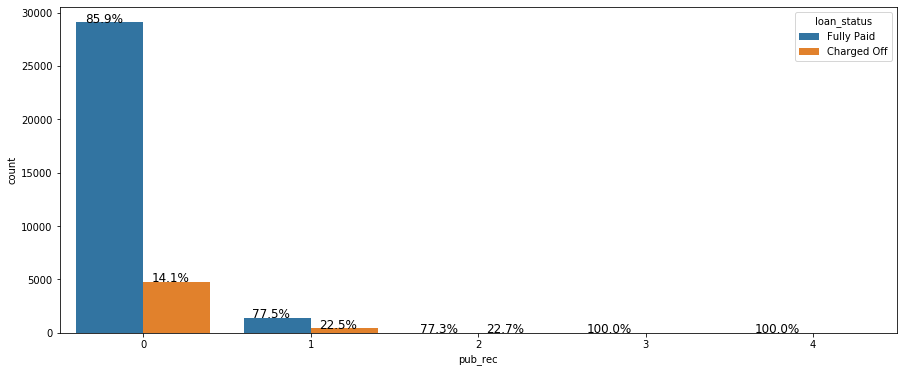

In [522]:
countplot_with_hue('pub_rec', (15,6))

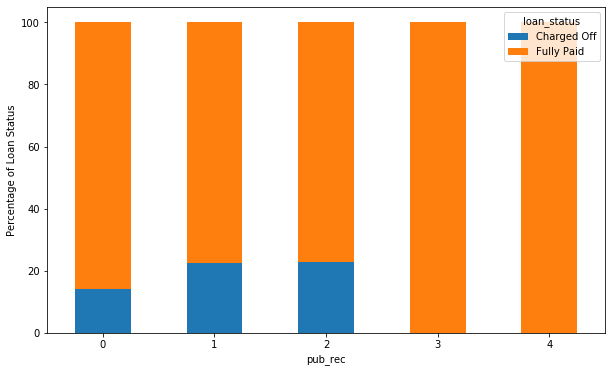

In [523]:
plot_stacked_bar('pub_rec', (10,6))

### Observation based on number of derogatory public records (pub_rec)

No pattern is observed. Users having 1 or 2 derogatory public records have same changes of charged off.

#### pub_rec_bankruptcies - Loan Status Analysis

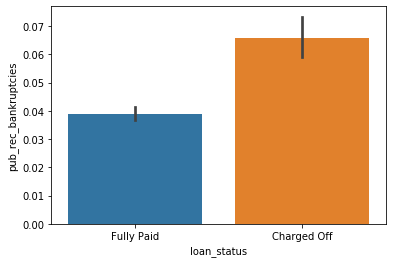

In [524]:
sns.barplot(y=lending_data['pub_rec_bankruptcies'], x=lending_data['loan_status'], estimator=np.mean)

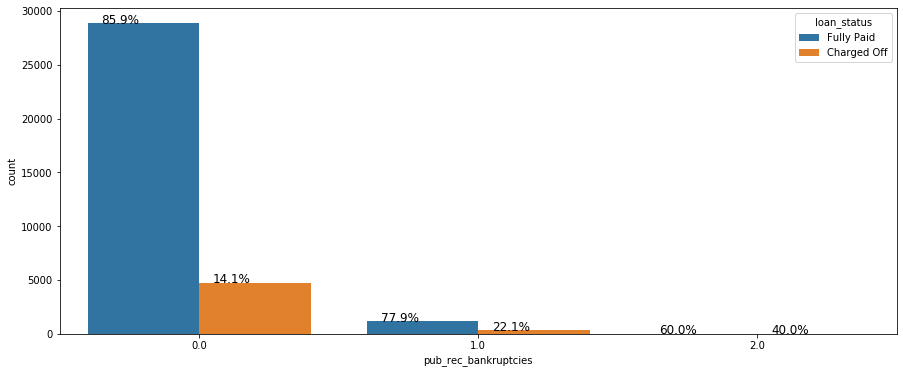

In [525]:
countplot_with_hue('pub_rec_bankruptcies', (15,6))

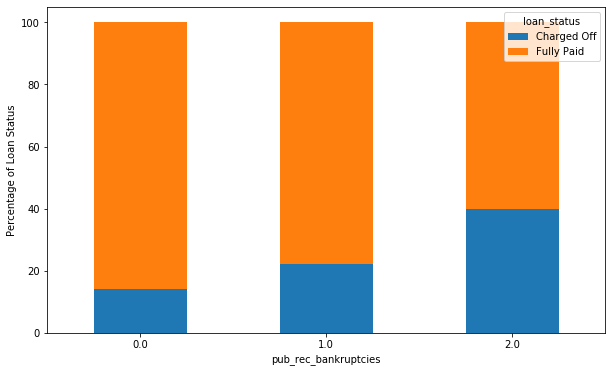

In [526]:
plot_stacked_bar('pub_rec_bankruptcies', (10,6))

### Observation based on number of public record bankruptcies

For higher public record bankrupties charged Off chances are high.

## Observations So Far.. 

Features that has impact on loan getting charged off are: loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, annual_inc, purpose, dti, revol_util and pub_rec_bankruptcies

## Bivariate Analysis

In [527]:
lending_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'recoveries', 'pub_rec_bankruptcies', 'loan_amnt_bin',
       'funded_amnt_bin', 'funded_amnt_inv_bin', 'int_rate_bin',
       'installment_bin', 'annual_inc_bin', 'issue_month', 'issue_year',
       'dti_bin', 'revol_bal_bin', 'revol_util_bin', 'total_acc_bin'],
      dtype='object')

loan_amnt - installment

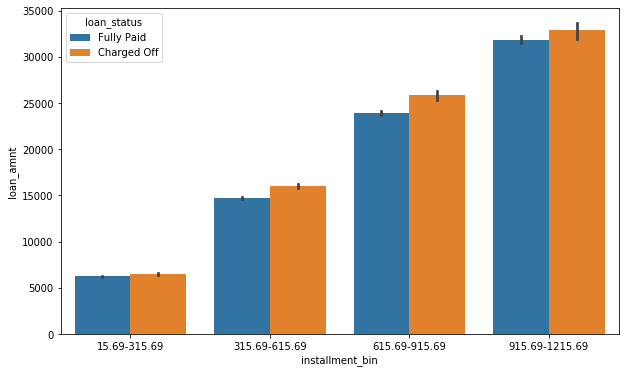

In [528]:
plt.figure(figsize=[10,6])
sns.barplot(x="installment_bin", y="loan_amnt", hue="loan_status", data=lending_data)
plt.show()

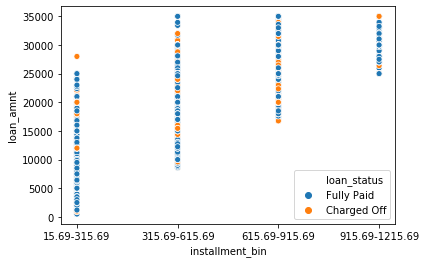

In [529]:
sns.scatterplot(x="installment_bin", y="loan_amnt", hue="loan_status", data=lending_data)

funded_amnt - installment

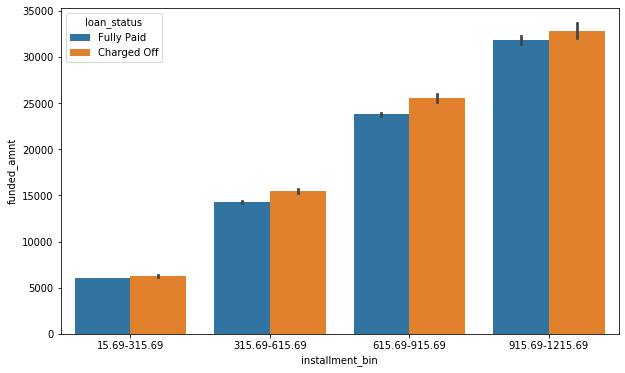

In [530]:
plt.figure(figsize=[10,6])
sns.barplot(x="installment_bin", y="funded_amnt", hue="loan_status", data=lending_data)
plt.show()

funded_amnt_inv - installment

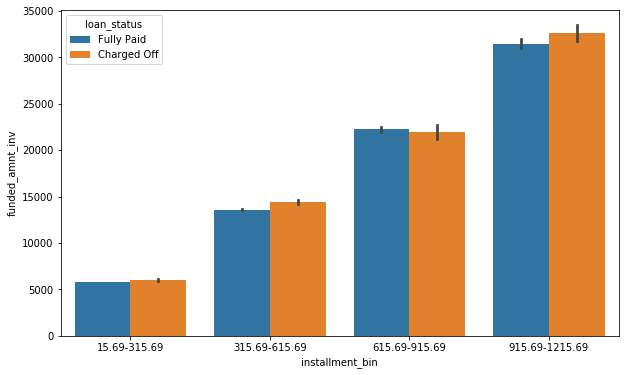

In [531]:
plt.figure(figsize=[10,6])
sns.barplot(x="installment_bin", y="funded_amnt_inv", hue="loan_status", data=lending_data)
plt.show()

grade - interest rate

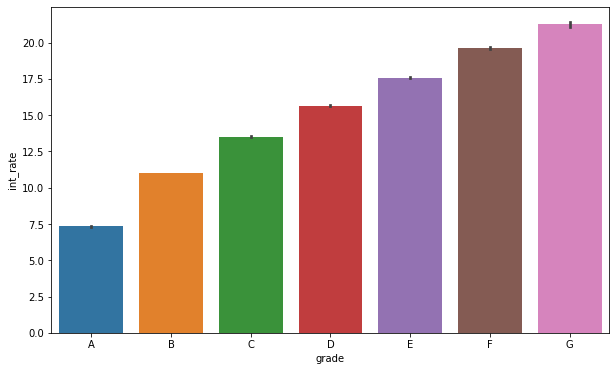

In [532]:
plt.figure(figsize=[10,6])
sns.barplot(x="grade", y="int_rate", data=lending_data.sort_values(by='grade'))
plt.show()

sub_grade - interest rate

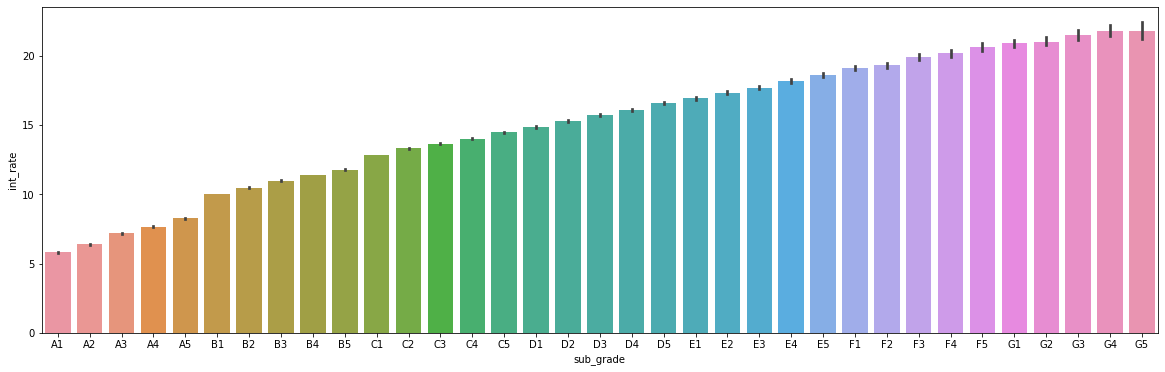

In [533]:
plt.figure(figsize=[20,6])
sns.barplot(x="sub_grade", y="int_rate", data=lending_data.sort_values(by='sub_grade'))
plt.show()

dti - annual income

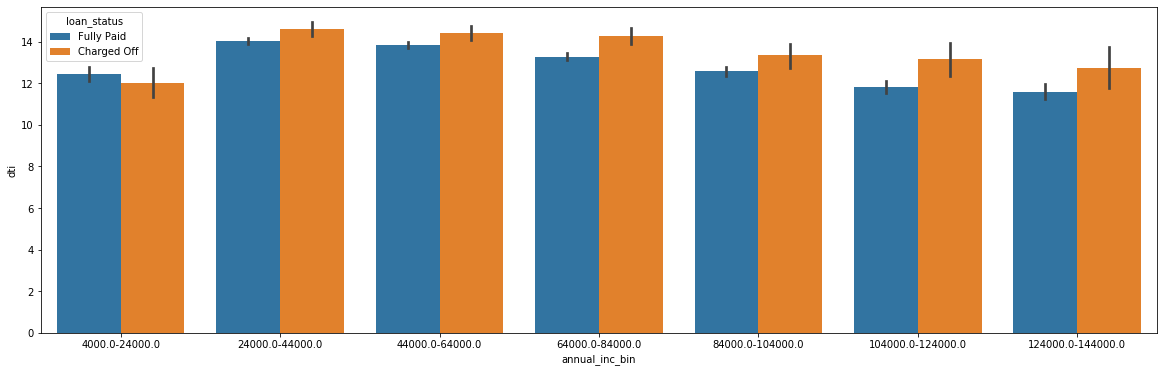

In [534]:
plt.figure(figsize=[20,6])
sns.barplot(x="annual_inc_bin", y="dti", hue='loan_status', data=lending_data)
plt.show()

purpose - int_rate

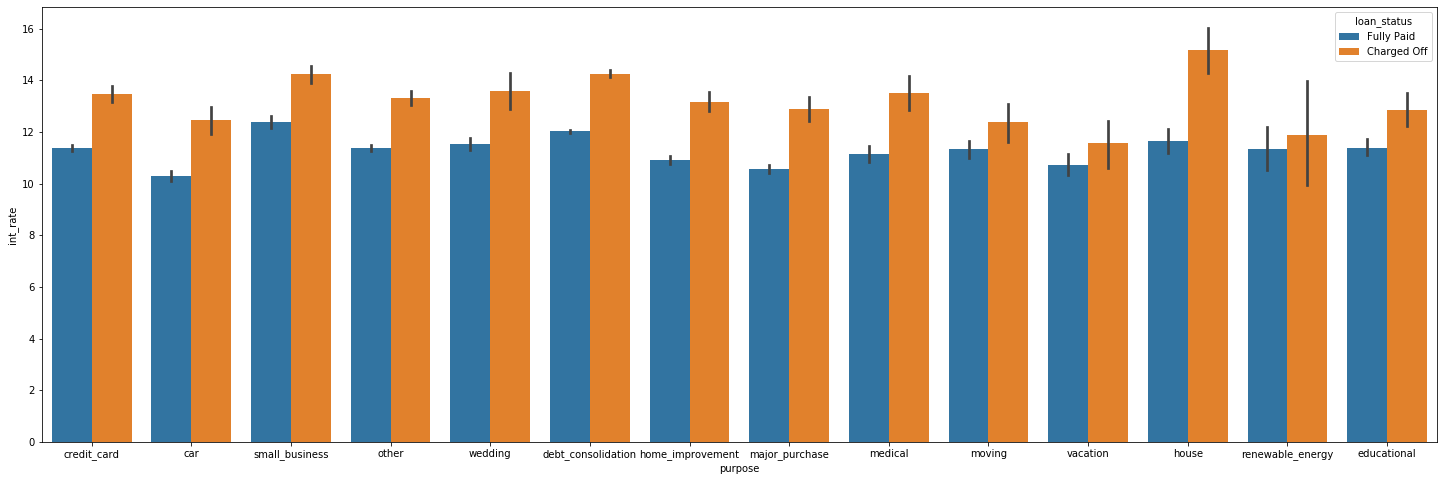

In [535]:
plt.figure(figsize=[25,8])
sns.barplot(x='purpose',y='int_rate', hue='loan_status', data=lending_data)
plt.show()

purpose - loan_amnt

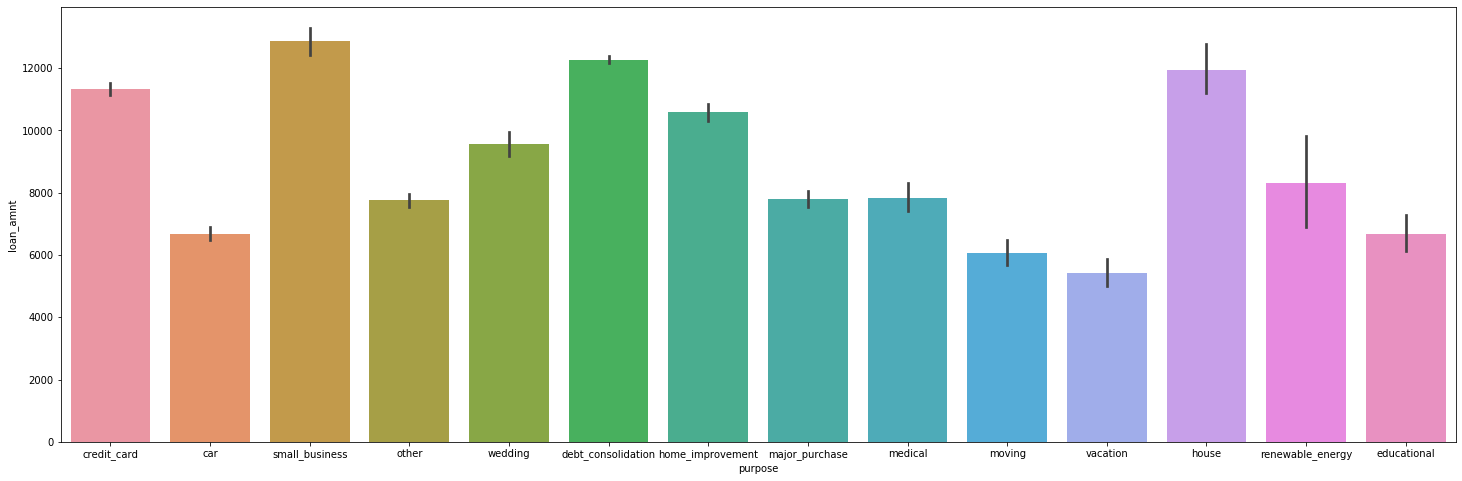

In [536]:
plt.figure(figsize=[25,8])
sns.barplot(x='purpose', y='loan_amnt', data=lending_data)
plt.show()

purpose - term

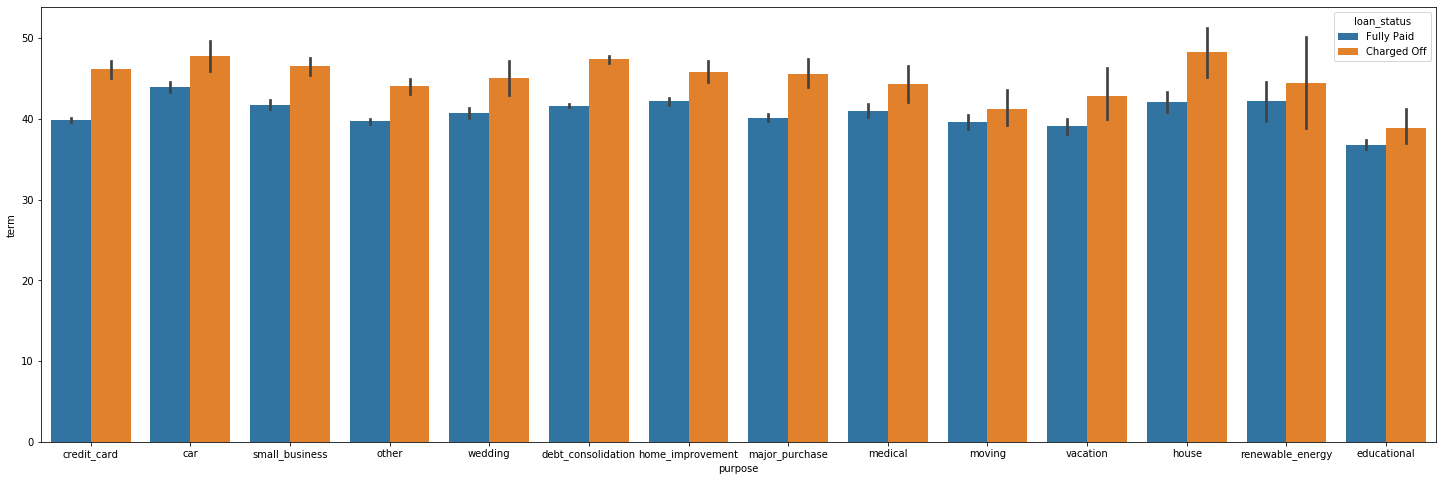

In [537]:
plt.figure(figsize=[25,8])
sns.barplot(x='purpose', y='term', hue='loan_status', data=lending_data)
plt.show()

purpose - annual_inc 

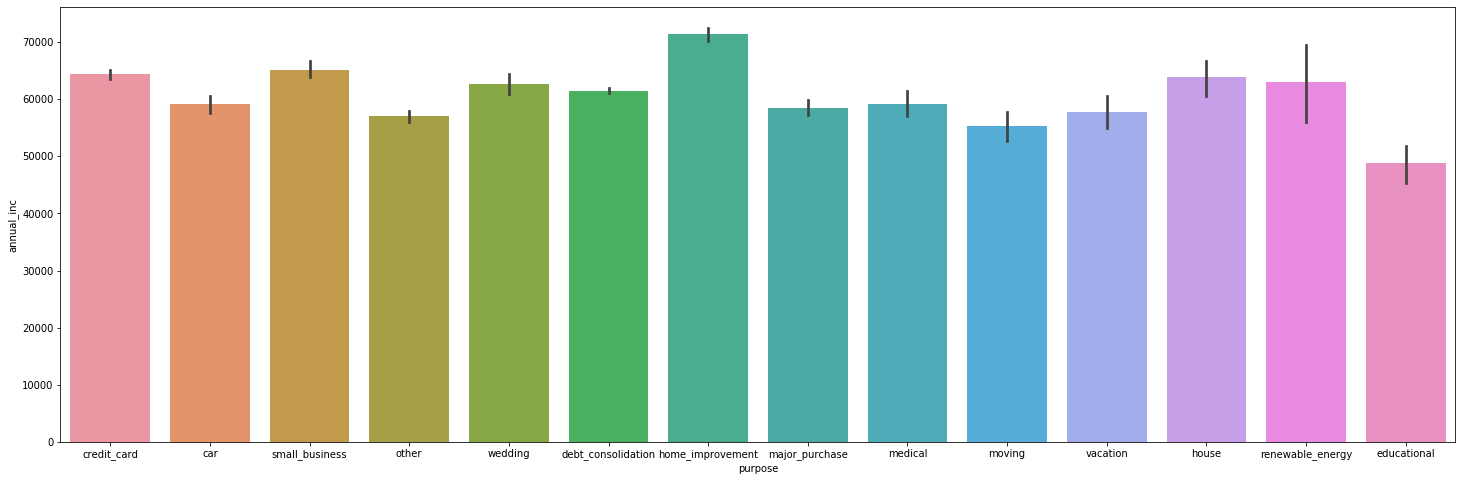

In [538]:
plt.figure(figsize=[25,8])
sns.barplot(x='purpose',y='annual_inc', data=lending_data)
plt.show()

revol_util_bin - interest Rate

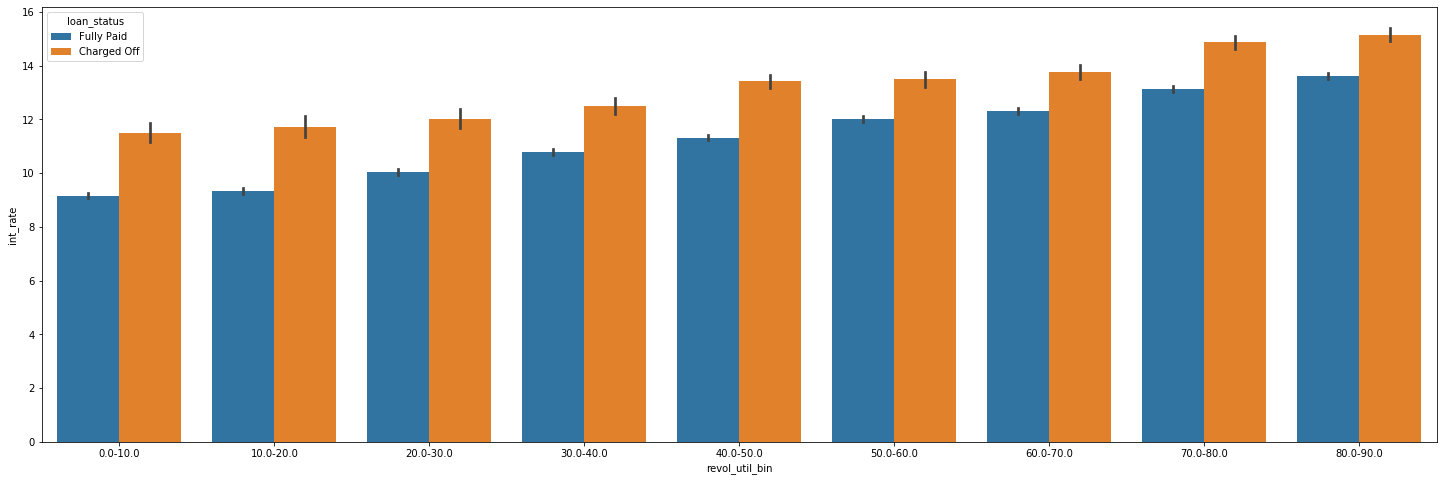

In [539]:
plt.figure(figsize=[25,8])
sns.barplot(x='revol_util_bin', hue='loan_status',y='int_rate', data=lending_data)
plt.show()

## Correlation Analysis

In [540]:
lending_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'recoveries', 'pub_rec_bankruptcies', 'loan_amnt_bin',
       'funded_amnt_bin', 'funded_amnt_inv_bin', 'int_rate_bin',
       'installment_bin', 'annual_inc_bin', 'issue_month', 'issue_year',
       'dti_bin', 'revol_bal_bin', 'revol_util_bin', 'total_acc_bin'],
      dtype='object')

In [541]:
#drop columns that are not needed
columns_to_keep = [ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                    'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                    'annual_inc', 'loan_status', 'purpose', 'dti', 'revol_util',
                    'pub_rec_bankruptcies']

lending_data = lending_data.loc[:, columns_to_keep]

In [542]:
#encode all the categorical features to find correlation
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [543]:
lending_data['grade_encoded'] = encoder.fit_transform(lending_data['grade'])
lending_data['sub_grade_encoded'] = encoder.fit_transform(lending_data['sub_grade'])

lending_data = pd.get_dummies(lending_data, columns=['purpose', 'loan_status'])
lending_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,dti,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status_Charged Off,loan_status_Fully Paid
0,5000,5000,4975.0,36,10.65,162.87,B,B2,24000.0,27.65,...,0,0,0,0,0,0,0,0,0,1
1,2500,2500,2500.0,60,15.27,59.83,C,C4,30000.0,1.00,...,0,0,0,0,0,0,0,0,1,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,12252.0,8.72,...,0,0,0,0,0,1,0,0,0,1
3,10000,10000,10000.0,36,13.49,339.31,C,C1,49200.0,20.00,...,0,0,0,1,0,0,0,0,0,1
5,5000,5000,5000.0,36,7.90,156.46,A,A4,36000.0,11.20,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36,8.70,158.30,B,B1,75000.0,15.55,...,0,0,0,0,0,0,0,0,0,1
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,110000.0,11.33,...,0,0,0,0,0,0,0,0,0,1
39713,8500,8500,875.0,36,10.28,275.38,C,C1,18000.0,6.40,...,0,0,0,0,0,0,0,0,0,1
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,100000.0,2.30,...,0,0,0,0,0,0,0,0,0,1


In [544]:
lending_data.drop(columns='loan_status_Fully Paid', inplace=True)

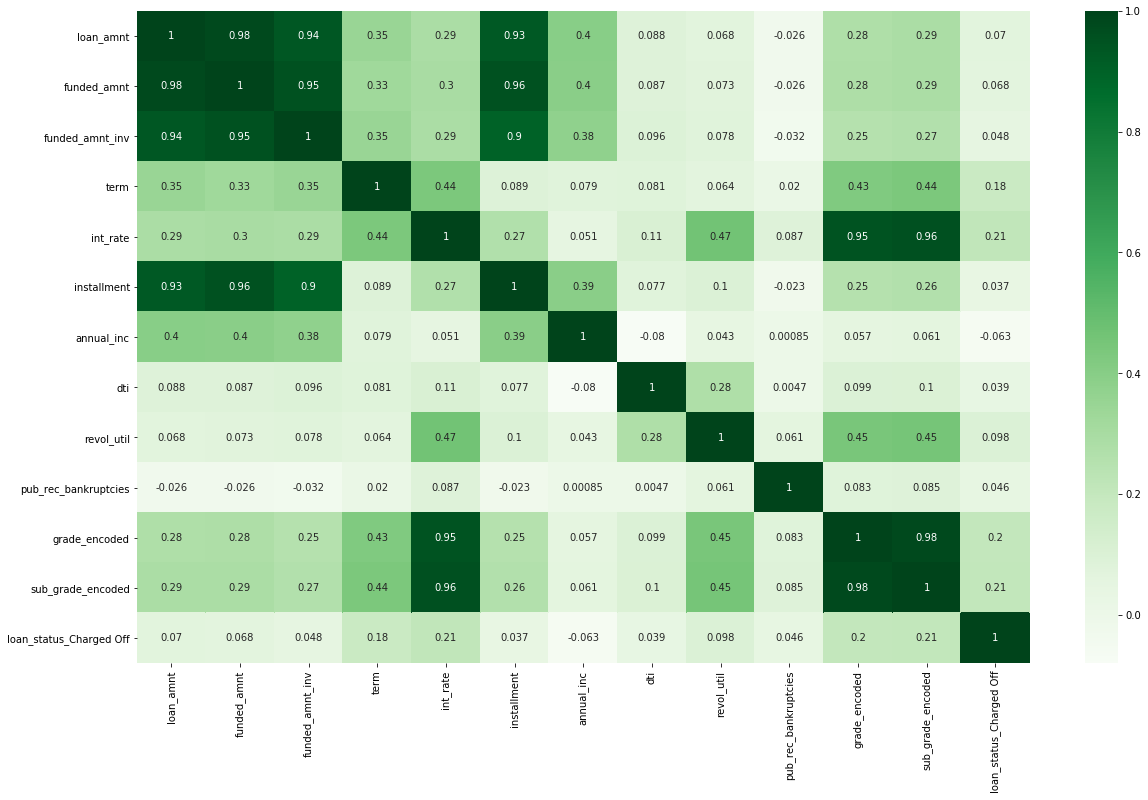

In [545]:
attributes = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
              'installment','grade', 'sub_grade', 'annual_inc','dti', 'revol_util',
              'pub_rec_bankruptcies', 'grade_encoded', 'sub_grade_encoded',
              'loan_status_Charged Off']
plt.figure(figsize=[20,12])
sns.heatmap(lending_data[attributes].corr(), cmap='Greens', annot=True)
plt.show()

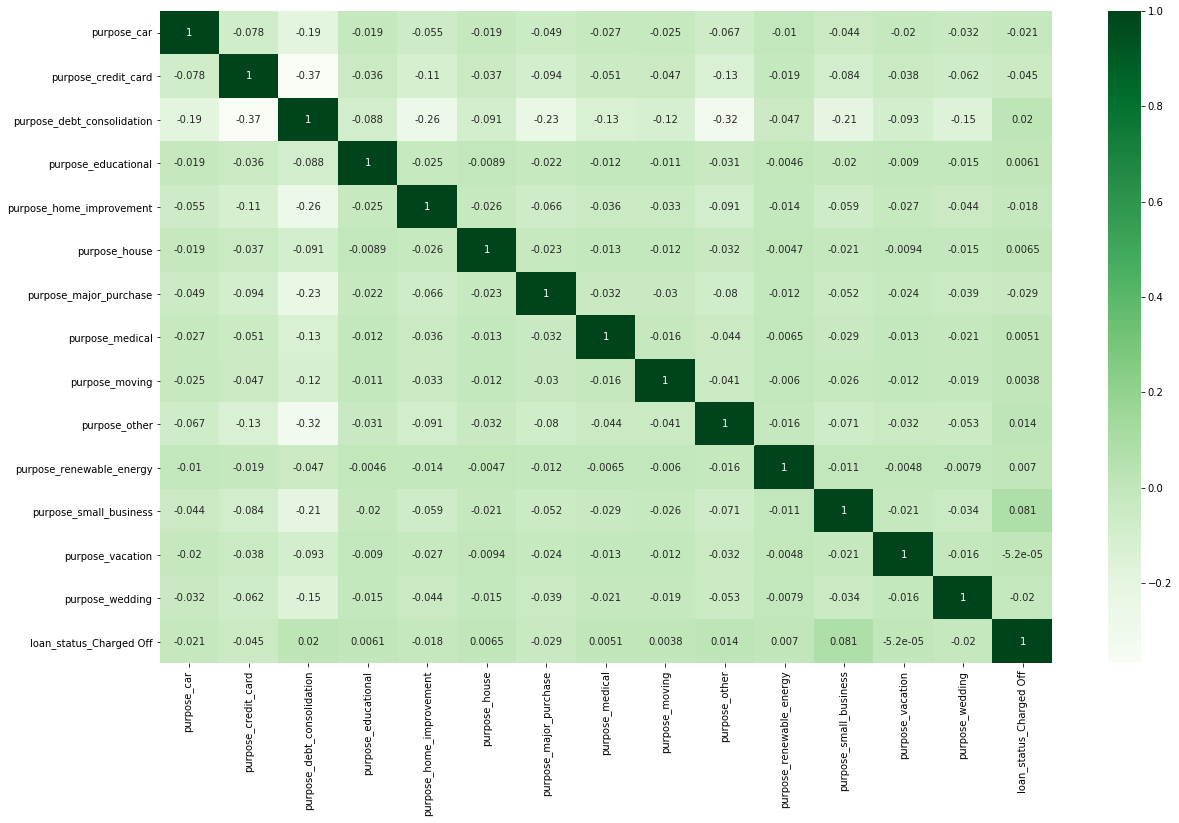

In [546]:
purpose = ['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'loan_status_Charged Off']
plt.figure(figsize=[20,12])
sns.heatmap(lending_data[purpose].corr(), cmap='Greens', annot=True)
plt.show()

As observed in heatmap, there is negative correlation between loan_status_charged Off and other features. Therefore, concluding that below features are contributing ones to make the loan as charged Off:<br> 1. loan_amnt<br> 2. funded_amnt_inv<br> 3. term<br> 4. int_rate<br> 5. installment<br> 6. grade<br> 7. sub_grade<br> 8. annual_inc<br> 9. purpose<br> 10. dti<br> 11. revol_util<br> 12. pub_rec_bankruptcies